In [77]:
import matplotlib.pyplot as plt
import os
import json
import numpy as np
from prettytable import PrettyTable

In [82]:
def read_experiment_data(folder_path, filename):
    file_path = os.path.join(folder_path, filename)
    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            data = json.load(file)
    else:
        print(f"File '{filename}' does not exist.")
    return data

def read_all_experiments_data(folder_path):
    combined_data = {}
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
            key = os.path.splitext(filename)[0]
            # print(key)
            combined_data[key] = data
    return combined_data

In [137]:
def print_table(data):
    table = PrettyTable()
    table.field_names = ["Arrival Rate", "Avg Time Spent", "Max Time Spent", "Avg Queue Size"]

    for arrival_rate in ['0.5', '0.8', '0.999']:
        avg_time_spent = np.mean(data[arrival_rate]['avg_time_spent'])
        max_time_spent = np.mean(data[arrival_rate]['max_time_spent'])
        avg_queue_size = np.mean(data[arrival_rate]['avg_queue_size'])
        table.add_row([arrival_rate, avg_time_spent, max_time_spent, avg_queue_size])

    table.align = "r"
    table.float_format = ".4"
    print(table)

def print_combined_table(combined_data):
    table = PrettyTable()
    table.field_names = ["Scenario", "Arrival Rate", "Avg Time Spent", "Max Time Spent", "Avg Queue Size"]
    scenarios = ['s1_uss', 's1_uss_d2', 's1_uss_d3', 's1_uss_d5', 
                 's2_uss_different_1', 's2_uss_different_2', 's2_uss_different_3', 
                 's2_uss_d2_different_1', 's2_uss_d2_different_2', 's2_uss_d2_different_3', 
                 's2_uss_d3_different_1', 's2_uss_d3_different_2', 's2_uss_d3_different_3', 
                 's2_uss_d5_different_1', 's2_uss_d5_different_2', 's2_uss_d5_different_3', 
                 ]

    for scenario in scenarios:
        table.add_row([scenario, '', '', '', ''])
        for arrival_rate in ['0.5', '0.8', '0.999']:
            avg_time_spent = np.mean(combined_data[scenario][arrival_rate]['avg_time_spent'])
            max_time_spent = np.mean(combined_data[scenario][arrival_rate]['max_time_spent'])
            avg_queue_size = np.mean(combined_data[scenario][arrival_rate]['avg_queue_size'])
            table.add_row(['', arrival_rate, avg_time_spent, max_time_spent, avg_queue_size])
        table.add_row(['', '', '', '', ''])
    
    table.align = "r"
    table.float_format = ".2"
    print(table)    

In [85]:
def plot_time(data):
    plt.figure(figsize=(14, 7))
    for arrival_rate in ['0.5', '0.8', '0.999']:
        plt.scatter(data[arrival_rate]['num_servers'], data[arrival_rate]['avg_time_spent'], s=2, label=f'lambda: {arrival_rate}')
    plt.xticks(fontproperties='Arial', fontsize=9)
    plt.xticks(fontproperties='Arial', fontsize=9)
    plt.yticks(fontproperties='Arial', fontsize=9)
    plt.xlabel('Number of servers', fontsize='9')
    plt.ylabel('Average time spent in the system', fontsize='9')
    plt.legend(fontsize='9')
    plt.show()

def plot_size(data):
    plt.figure(figsize=(14, 7))
    for arrival_rate in ['0.5', '0.8', '0.999']:
        plt.scatter(data[arrival_rate]['num_servers'], data[arrival_rate]['avg_queue_size'], s=2, label=f'lambda: {arrival_rate}')
    plt.xticks(fontproperties='Arial', fontsize=9)
    plt.xticks(fontproperties='Arial', fontsize=9)
    plt.yticks(fontproperties='Arial', fontsize=9)
    plt.xlabel('Number of servers', fontsize='9')
    plt.ylabel('Average queue size', fontsize='9')
    plt.legend(fontsize='9')
    plt.show()

def plot_combined(combined_data, arrival_rate, scenario):
    if scenario == 's1_uss':
        scenarios = ['s1_uss', 's1_uss_d2', 's1_uss_d3', 's1_uss_d5']
    elif scenario == 's2_uss_different_1':
        scenarios = ['s2_uss_different_1', 's2_uss_d2_different_1', 's2_uss_d3_different_1', 's2_uss_d5_different_1']
    elif scenario == 's2_uss_different_2':
        scenarios = ['s2_uss_different_2', 's2_uss_d2_different_2', 's2_uss_d3_different_2', 's2_uss_d5_different_2']
    elif scenario == 's2_uss_different_3':
        scenarios = ['s2_uss_different_3', 's2_uss_d2_different_3', 's2_uss_d3_different_3', 's2_uss_d5_different_3']

    plt.figure(figsize=(14, 7))
    for s in scenarios:
        plt.plot(combined_data[s][arrival_rate]['num_servers'], combined_data[s][arrival_rate]['avg_time_spent'], label=f'scenario: {s}')

    plt.xticks(fontproperties='Arial', fontsize=9)
    plt.yticks(fontproperties='Arial', fontsize=9)
    plt.xlabel('Number of servers', fontsize='9')
    plt.ylabel('Average time spent in the system', fontsize='9')
    plt.title(f'Lambda = {arrival_rate}')
    plt.legend(fontsize='9')
    plt.show()


def plot_histogram(combined_data, arrival_rate, servers_speed):
    if servers_speed == 'different_1':
        scenarios = ['s2_uss_different_1', 's2_uss_d2_different_1']
    elif servers_speed == 'different_2':
        scenarios = ['s2_uss_different_2', 's2_uss_d2_different_2']
    elif servers_speed == 'different_3':
        scenarios = ['s2_uss_different_3', 's2_uss_d2_different_3']

    for s in scenarios:
        data = combined_data[s][arrival_rate]['server_utilization']['20']
        bins = [i for i in range(1, len(data) + 1)]
        plt.figure(figsize=(14, 7))
        plt.bar(bins, data, label=f'scenario: {s}')

        plt.xticks(fontproperties='Arial', fontsize=9)
        plt.yticks(fontproperties='Arial', fontsize=9)
        plt.xlabel('Number of servers', fontsize='9')
        plt.ylabel('Server utilization', fontsize='9')
        plt.title(f'Lambda = {arrival_rate}')
        plt.legend(fontsize='9')
        plt.show()

In [86]:
path_table = './experiments/1.0_100000_100_10/table'
path_plot = './experiments/1.0_10000_100_10/plot'
path_histogram = './experiments/1.0_10000_20_10/histogram'

# Pierwszy scenariusz

### Identyczne serwery i zadania

#### a) jednostajny wybór serwera

In [136]:
table = PrettyTable()
table.field_names = ["Arrival Rate", "Theoretical Avg Time Spent"]

for arrival_rate in [0.5, 0.8, 0.999]:
    avg_time_spent = 1.0 / (1.0 - arrival_rate)
    table.add_row([arrival_rate, avg_time_spent])

table.align = "r"
table.float_format = ".3"
print(table)

+--------------+----------------------------+
| Arrival Rate | Theoretical Avg Time Spent |
+--------------+----------------------------+
|        0.500 |                      2.000 |
|        0.800 |                      5.000 |
|        0.999 |                   1000.000 |
+--------------+----------------------------+


In [138]:
print_table(read_experiment_data(path_table, 's1_uss'))

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |         1.9965 |        20.0256 |         0.9972 |
|          0.8 |         4.8134 |        40.7363 |         3.8137 |
|        0.999 |        23.5610 |       132.0037 |        22.3893 |
+--------------+----------------+----------------+----------------+


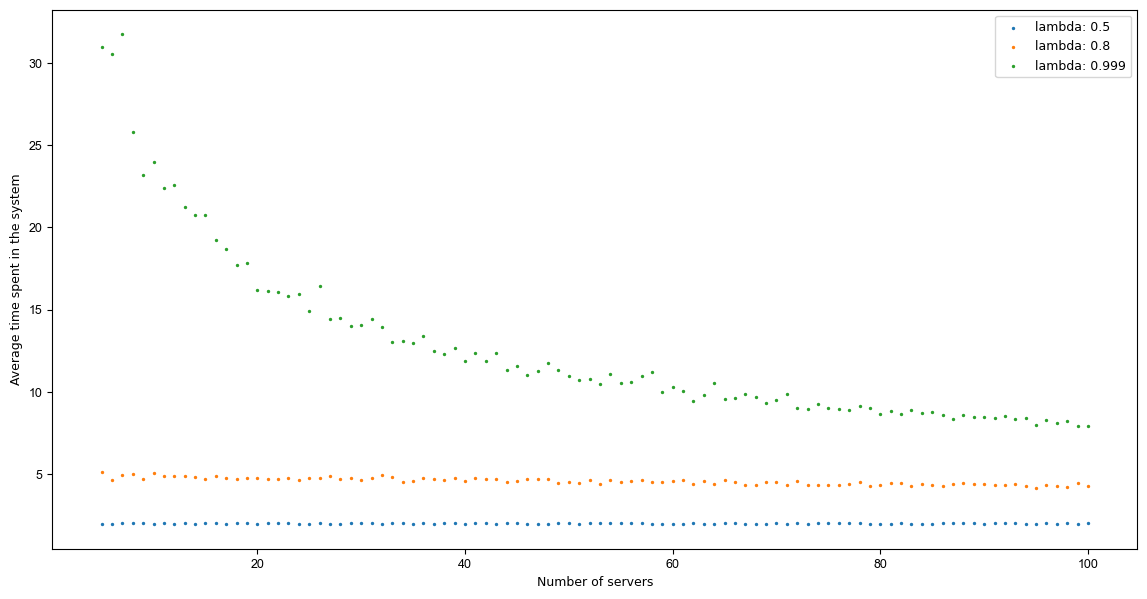

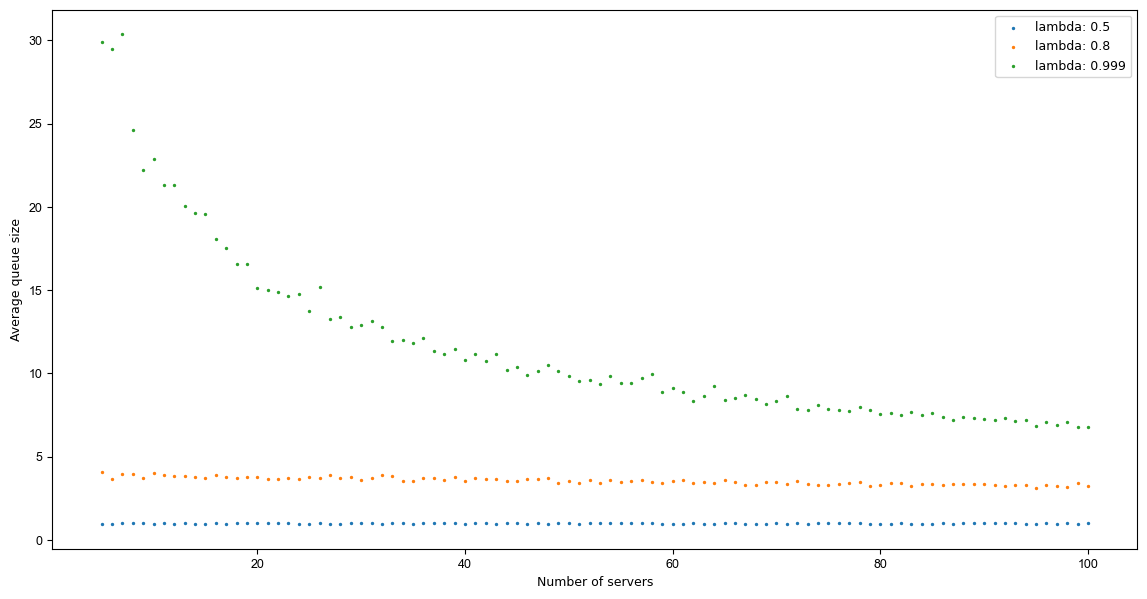

In [88]:
plot_time(read_experiment_data(path_plot, 's1_uss'))
plot_size(read_experiment_data(path_plot, 's1_uss'))

#### b) wybór mniej obciążonego z 2 jednostajnie wybranych serwerów

In [139]:
print_table(read_experiment_data(path_table, 's1_uss_d2'))

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |         1.2651 |        13.3816 |         0.2641 |
|          0.8 |         1.9649 |        15.9466 |         0.9597 |
|        0.999 |         6.3520 |        27.2556 |         5.3562 |
+--------------+----------------+----------------+----------------+


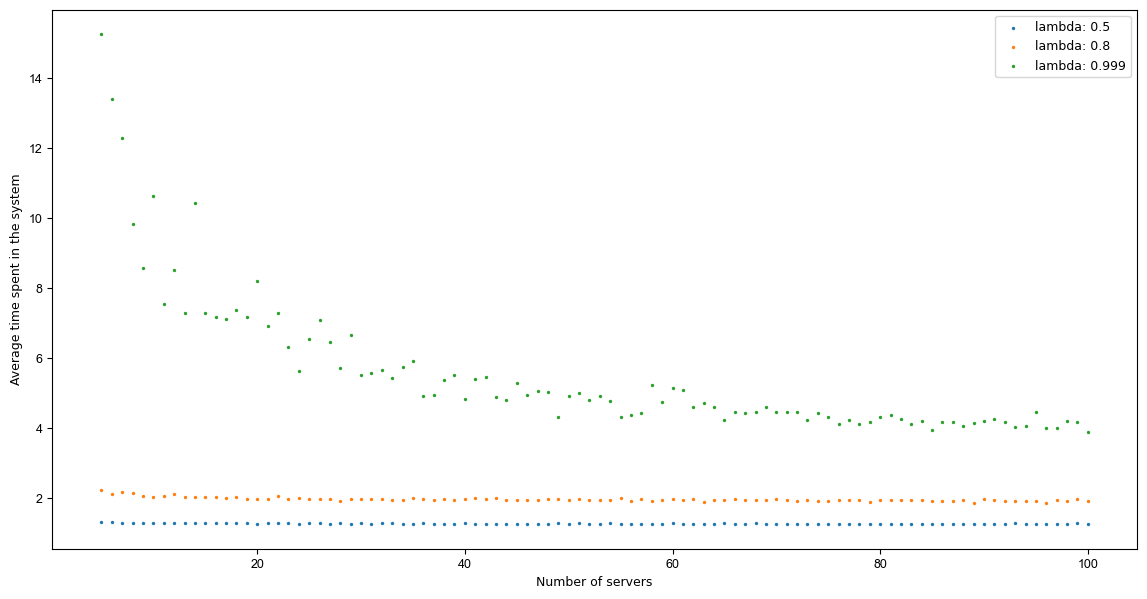

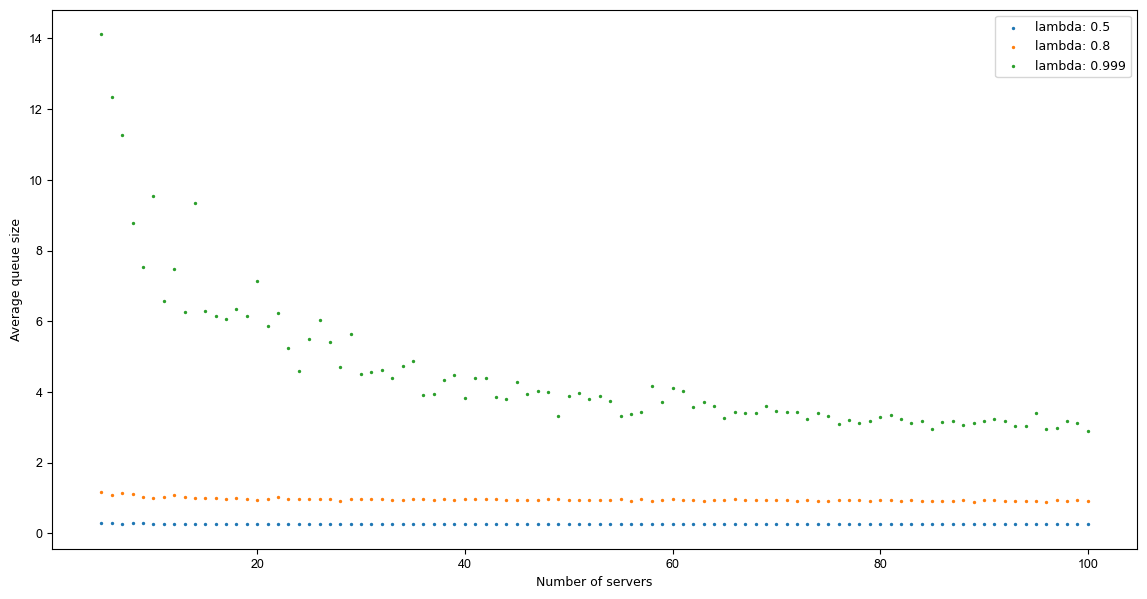

In [90]:
plot_time(read_experiment_data(path_plot, 's1_uss_d2'))
plot_size(read_experiment_data(path_plot, 's1_uss_d2'))

#### c) wybór mniej obciążonego z d jednostajnie wybranych serwerów

In [140]:
print_table(read_experiment_data(path_table, 's1_uss_d3'))

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |         1.1275 |        12.7994 |         0.1257 |
|          0.8 |         1.5810 |        15.1919 |         0.5822 |
|        0.999 |         6.3720 |        27.5836 |         5.3489 |
+--------------+----------------+----------------+----------------+


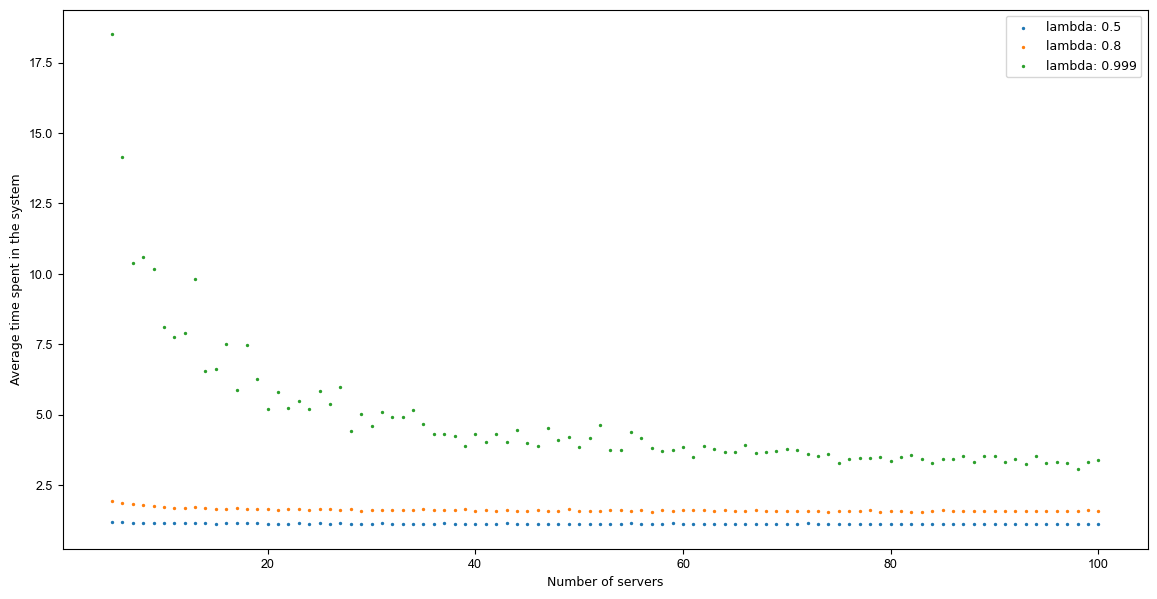

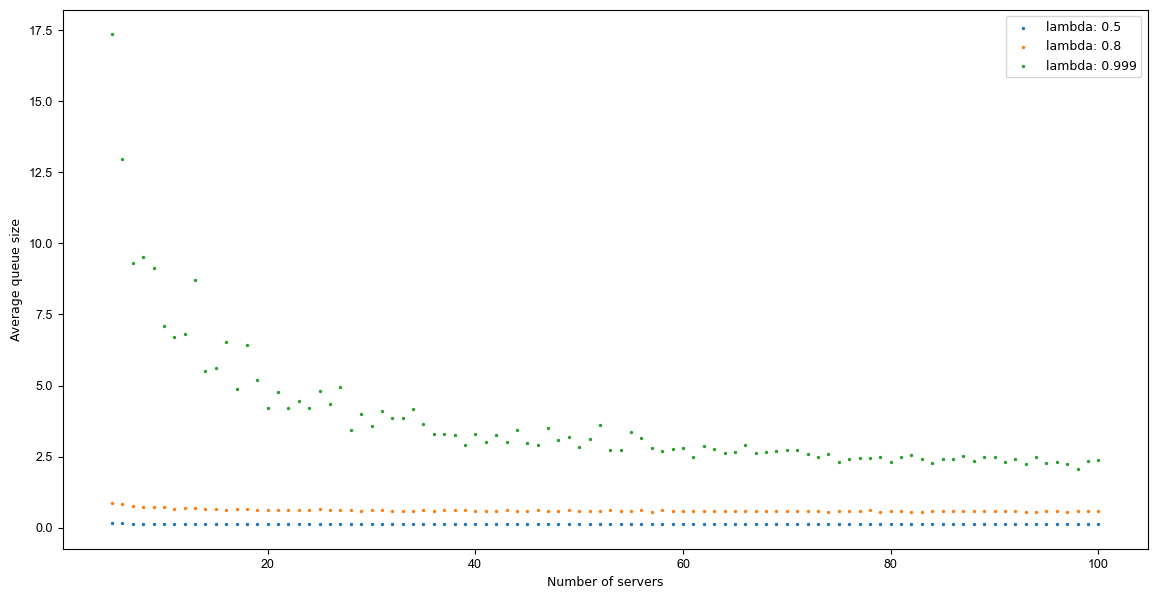

In [93]:
plot_time(read_experiment_data(path_plot, 's1_uss_d3'))
plot_size(read_experiment_data(path_plot, 's1_uss_d3'))

In [141]:
print_table(read_experiment_data(path_table, 's1_uss_d5'))

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |         1.0327 |        12.4753 |         0.0329 |
|          0.8 |         1.3353 |        13.9195 |         0.3337 |
|        0.999 |         4.5337 |        21.8814 |         3.5270 |
+--------------+----------------+----------------+----------------+


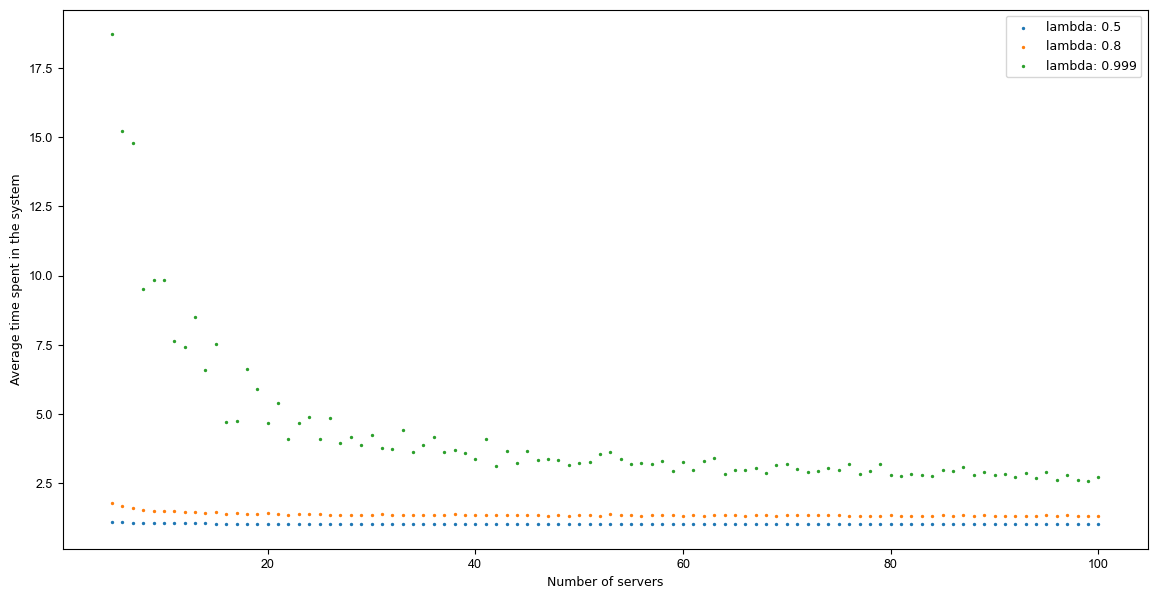

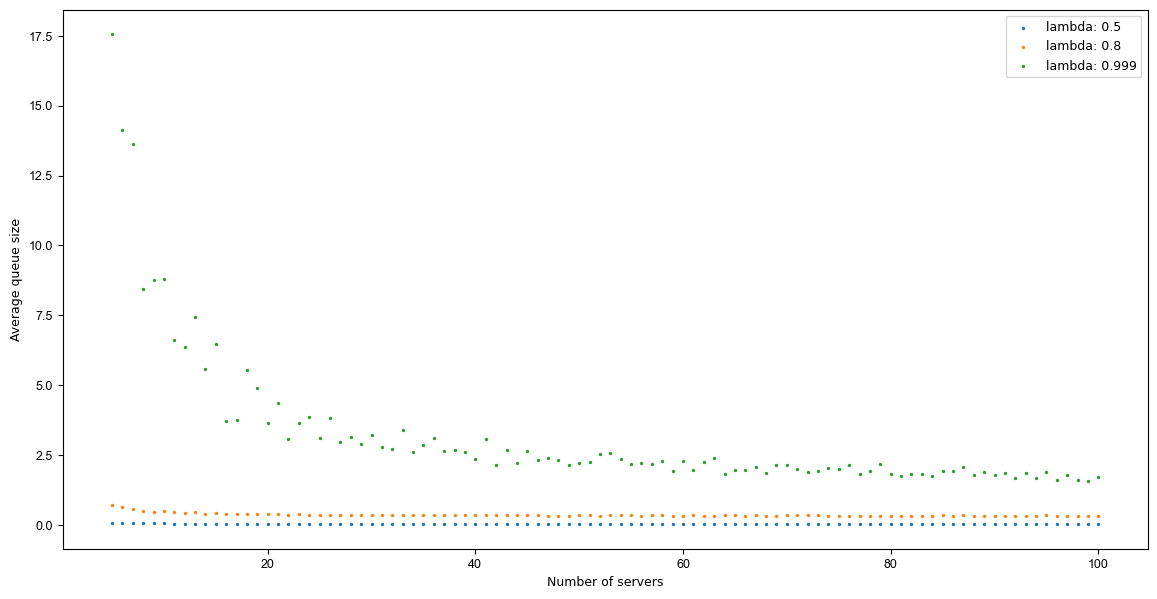

In [95]:
plot_time(read_experiment_data(path_plot, 's1_uss_d5'))
plot_size(read_experiment_data(path_plot, 's1_uss_d5'))

# Drugi scenariusz

### Serwery o różnej szybkości, takie same zadania

#### a) jednostajny wybór serwera

In [142]:
print_table(read_experiment_data(path_table, 's2_uss_different_1'))

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |         0.0120 |         4.4004 |         0.0696 |
|          0.8 |         0.0141 |         6.0033 |         0.2055 |
|        0.999 |         0.0159 |         5.9469 |         0.3533 |
+--------------+----------------+----------------+----------------+


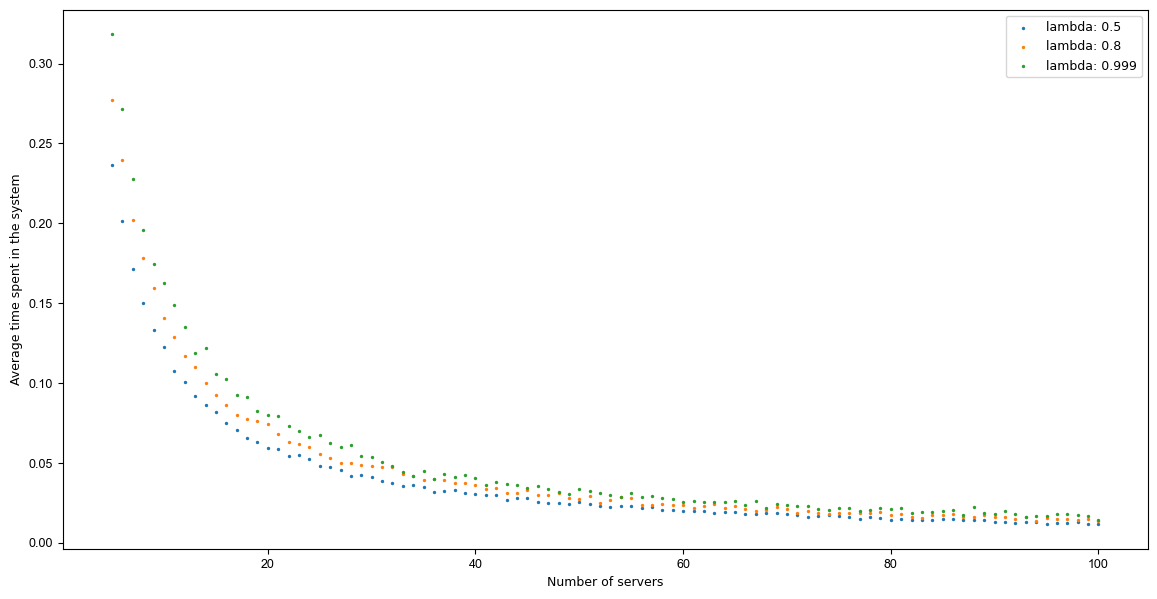

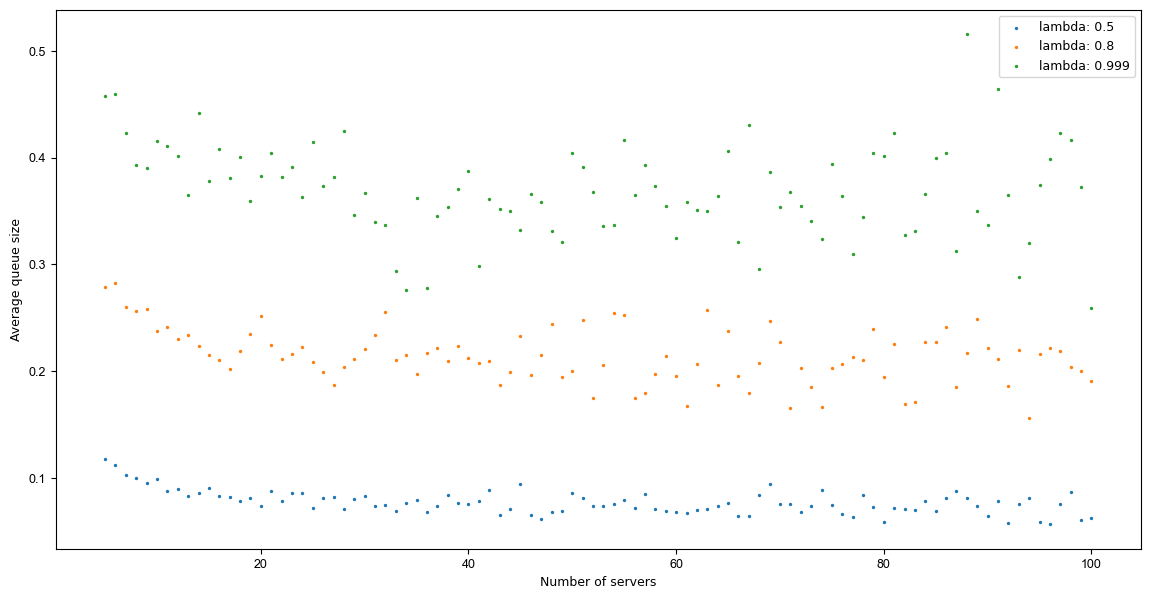

In [97]:
plot_time(read_experiment_data(path_plot, 's2_uss_different_1'))
plot_size(read_experiment_data(path_plot, 's2_uss_different_1'))

In [143]:
print_table(read_experiment_data(path_table, 's2_uss_different_2'))

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |         0.0650 |        11.3427 |         0.2234 |
|          0.8 |         0.0947 |        20.2720 |         0.8251 |
|        0.999 |         0.3003 |        55.6596 |         4.8870 |
+--------------+----------------+----------------+----------------+


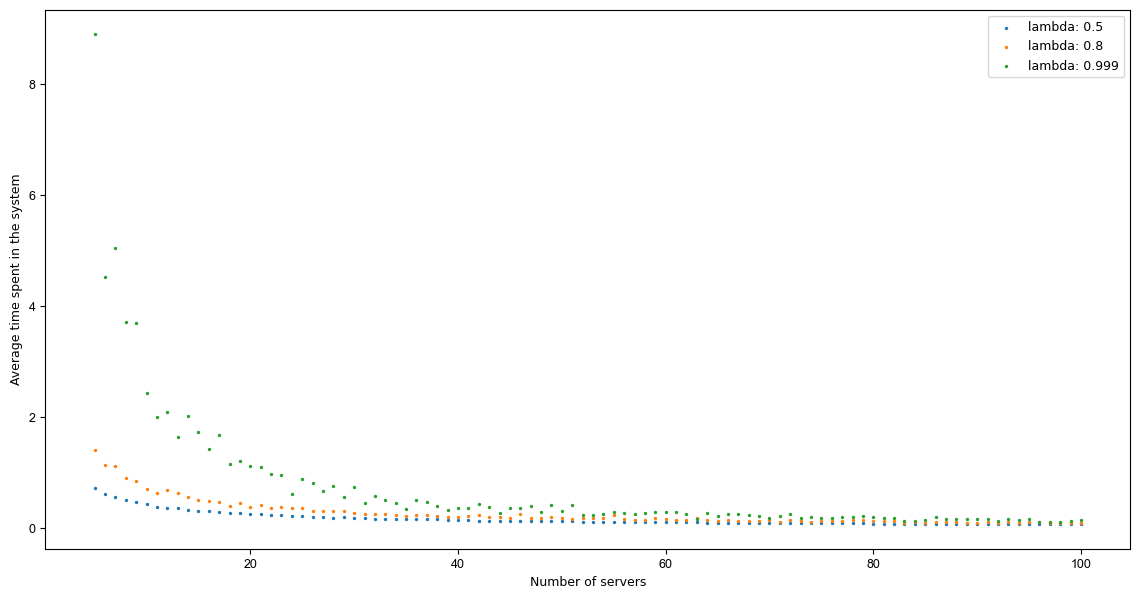

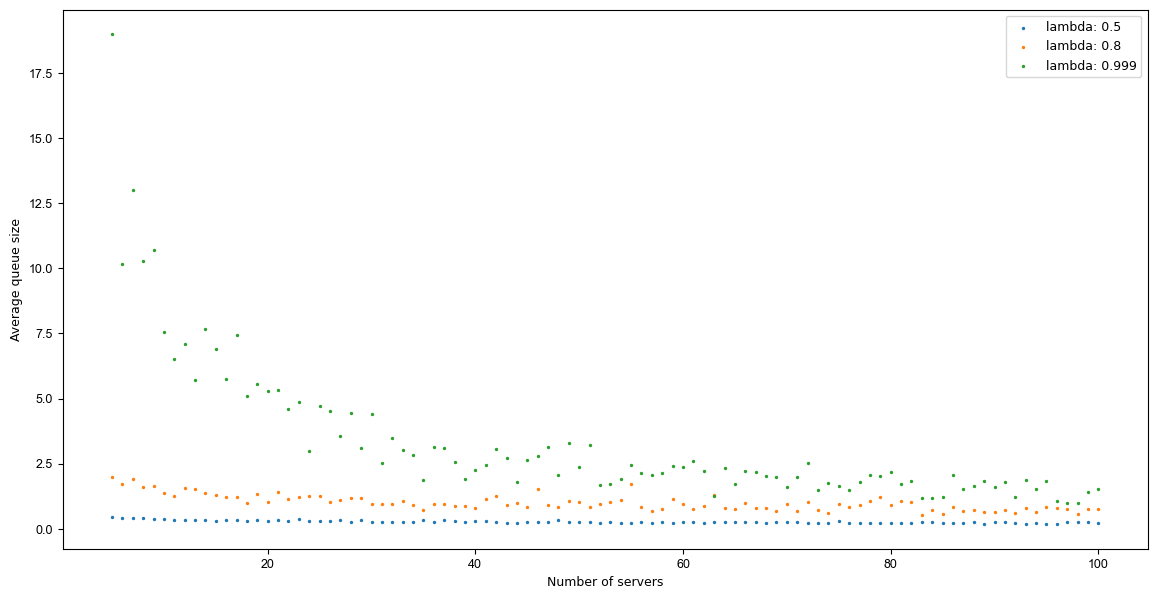

In [99]:
plot_time(read_experiment_data(path_plot, 's2_uss_different_2'))
plot_size(read_experiment_data(path_plot, 's2_uss_different_2'))

In [144]:
print_table(read_experiment_data(path_table, 's2_uss_different_3'))

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |      1959.3361 |      8906.0227 |       288.7956 |
|          0.8 |      2150.4699 |      9828.7951 |       282.3333 |
|        0.999 |      2236.0195 |     10014.5466 |       285.3185 |
+--------------+----------------+----------------+----------------+


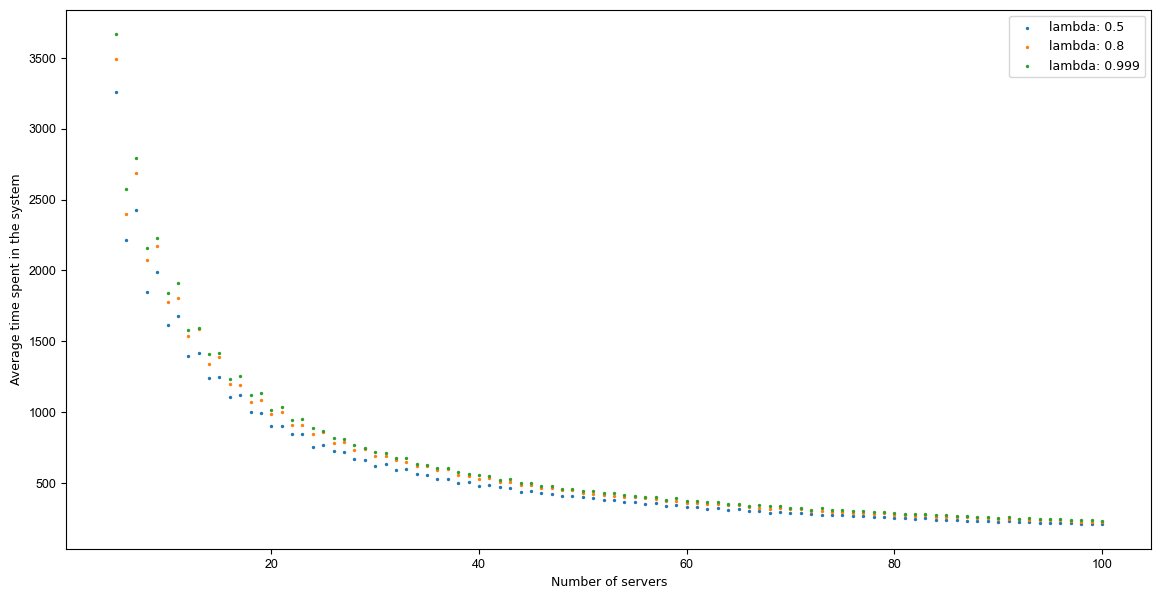

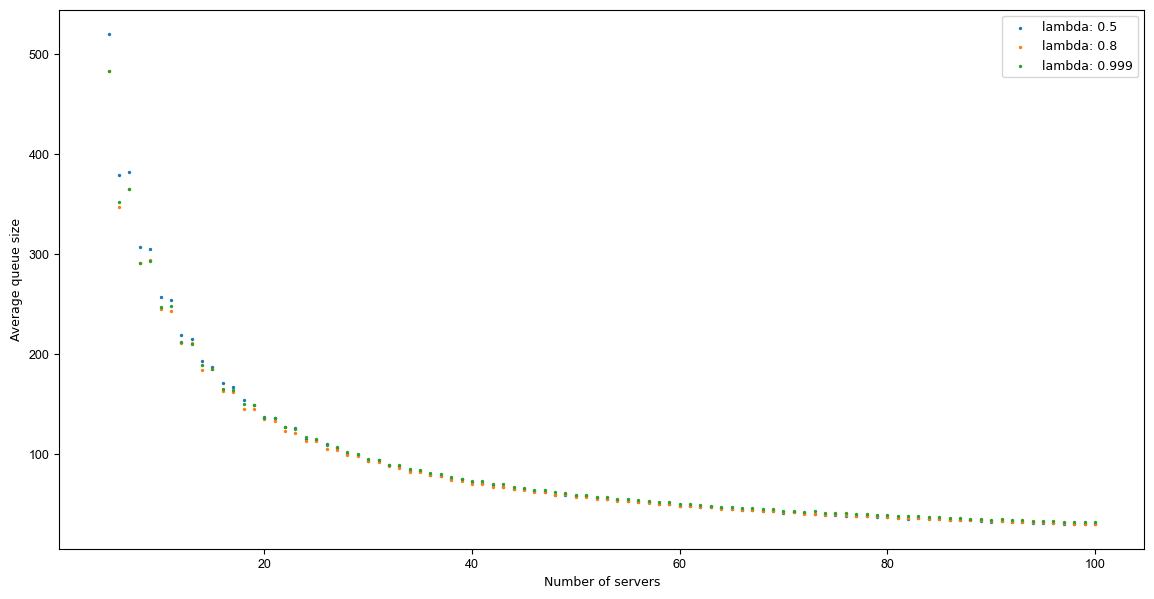

In [101]:
plot_time(read_experiment_data(path_plot, 's2_uss_different_3'))
plot_size(read_experiment_data(path_plot, 's2_uss_different_3'))

#### b) wybór mniej obciążonego z 2 jednostajnie wybranych serwerów

In [145]:
print_table(read_experiment_data(path_table, 's2_uss_d2_different_1'))

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |         0.0086 |         3.3774 |         0.0001 |
|          0.8 |         0.0080 |         3.4284 |         0.0001 |
|        0.999 |         0.0077 |         3.3542 |         0.0002 |
+--------------+----------------+----------------+----------------+


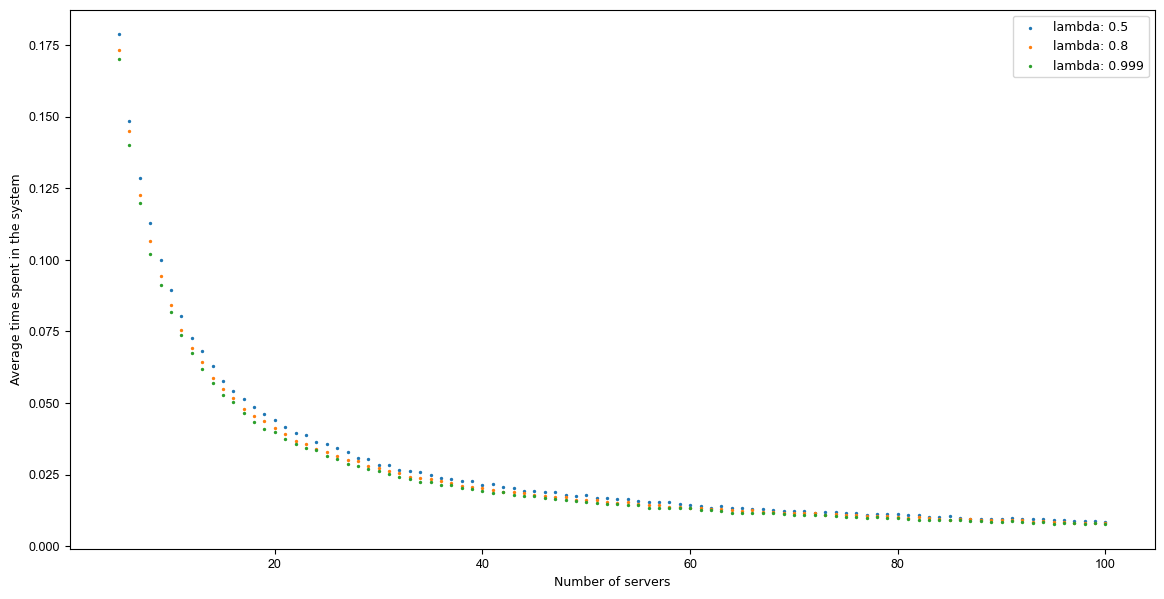

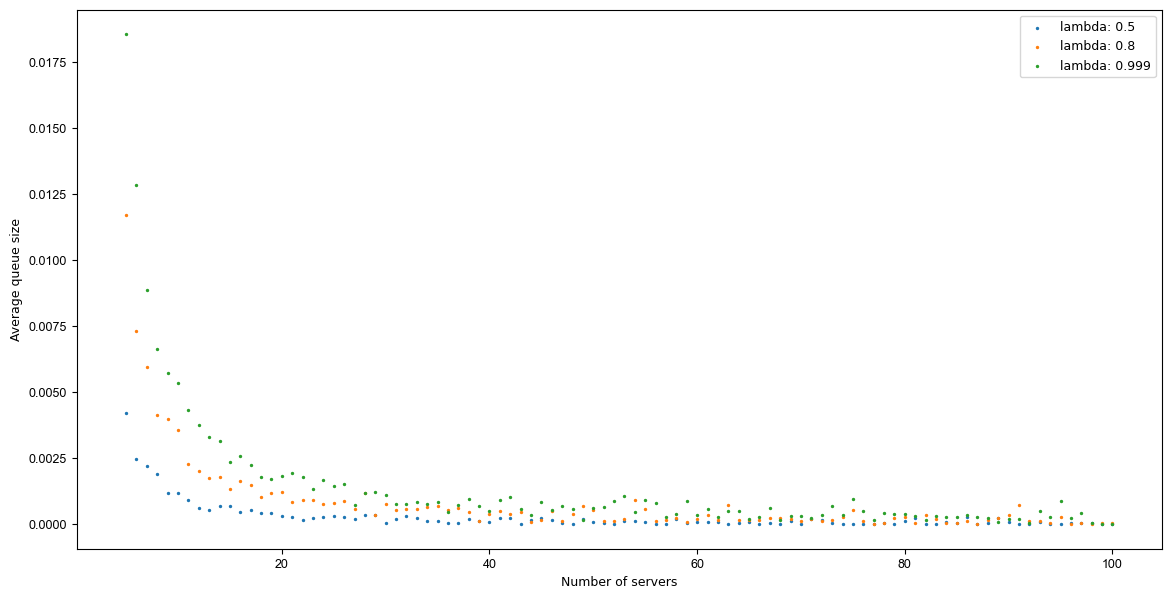

In [103]:
plot_time(read_experiment_data(path_plot, 's2_uss_d2_different_1'))
plot_size(read_experiment_data(path_plot, 's2_uss_d2_different_1'))

In [146]:
print_table(read_experiment_data(path_table, 's2_uss_d2_different_2'))

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |         0.0468 |         7.1940 |         0.0007 |
|          0.8 |         0.0448 |         6.7093 |         0.0017 |
|        0.999 |         0.0437 |         7.2253 |         0.0025 |
+--------------+----------------+----------------+----------------+


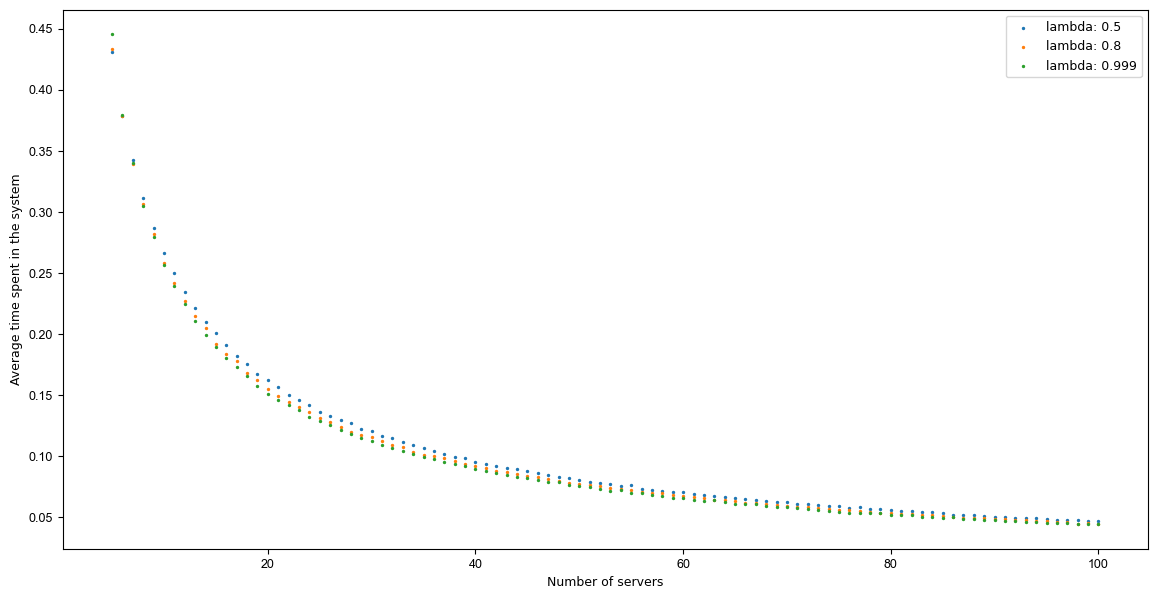

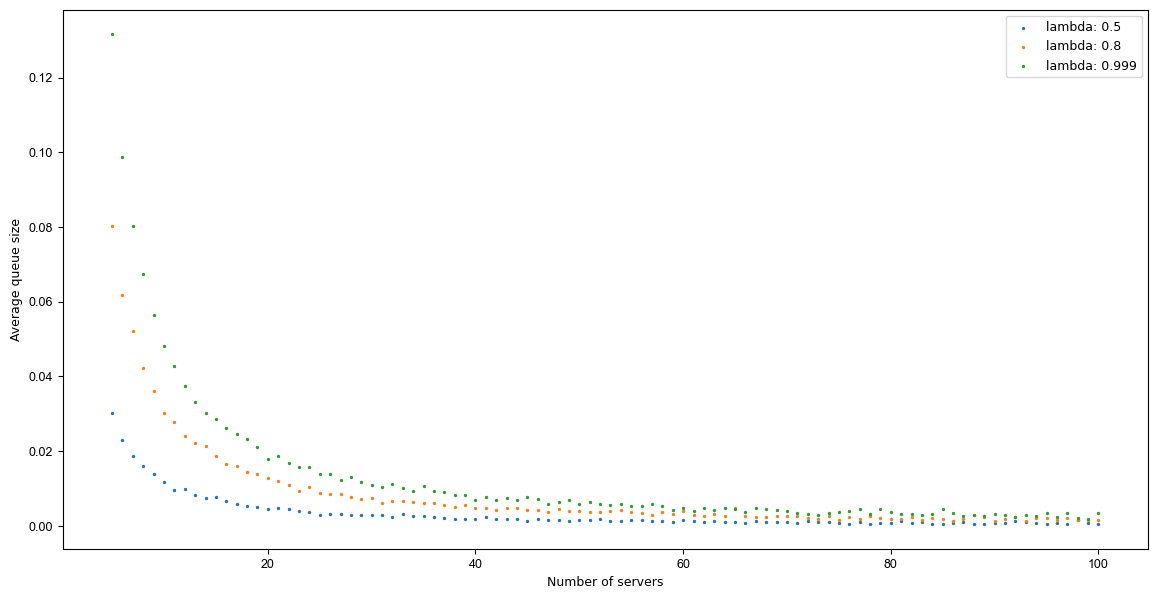

In [105]:
plot_time(read_experiment_data(path_plot, 's2_uss_d2_different_2'))
plot_size(read_experiment_data(path_plot, 's2_uss_d2_different_2'))

In [147]:
print_table(read_experiment_data(path_table, 's2_uss_d2_different_3'))

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |       339.5530 |      3291.3100 |        84.6969 |
|          0.8 |       526.0225 |      4112.1262 |       158.4355 |
|        0.999 |       646.7778 |      4262.5810 |       227.3958 |
+--------------+----------------+----------------+----------------+


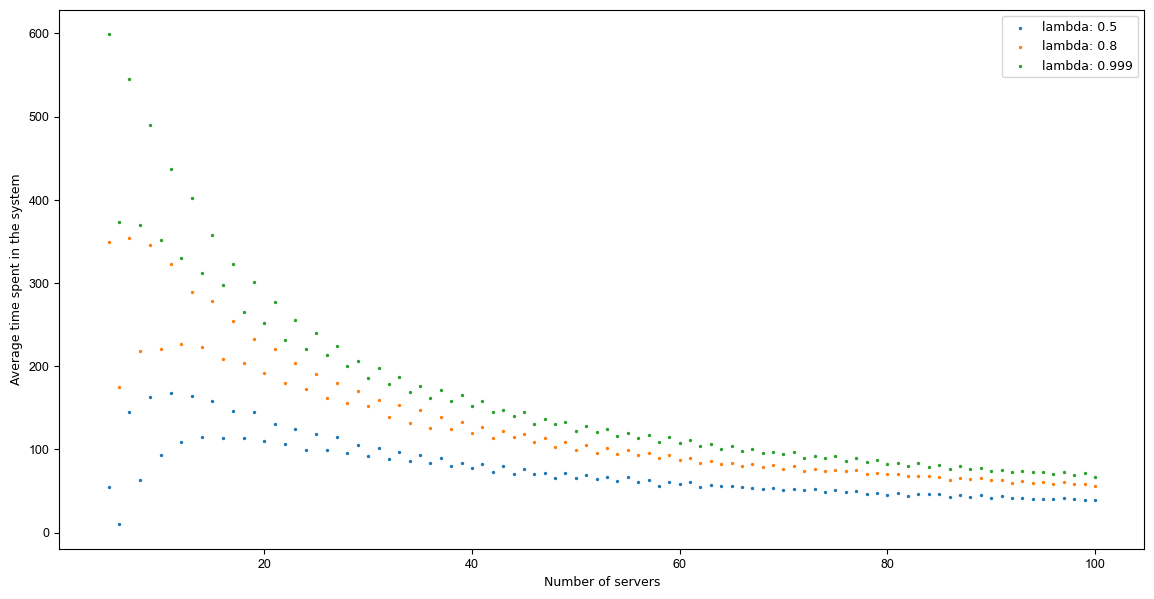

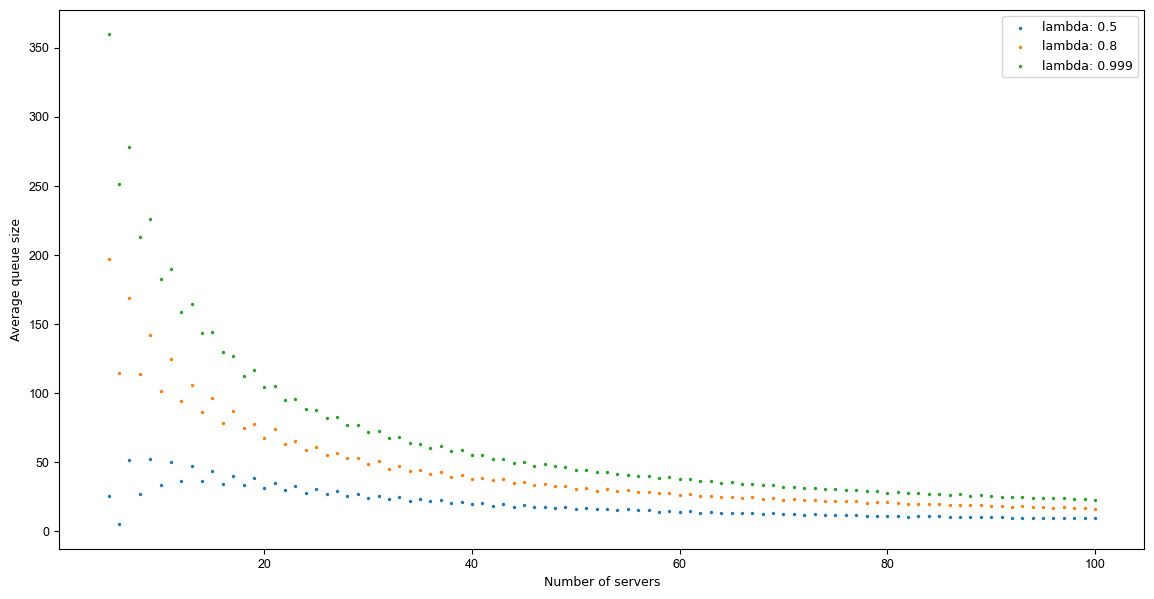

In [107]:
plot_time(read_experiment_data(path_plot, 's2_uss_d2_different_3'))
plot_size(read_experiment_data(path_plot, 's2_uss_d2_different_3'))

#### c) wybór mniej obciążonego z d jednostajnie wybranych serwerów

In [148]:
print_table(read_experiment_data(path_table, 's2_uss_d3_different_1'))

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |         0.0087 |         3.5819 |         0.0000 |
|          0.8 |         0.0081 |         3.5090 |         0.0000 |
|        0.999 |         0.0077 |         3.6999 |         0.0000 |
+--------------+----------------+----------------+----------------+


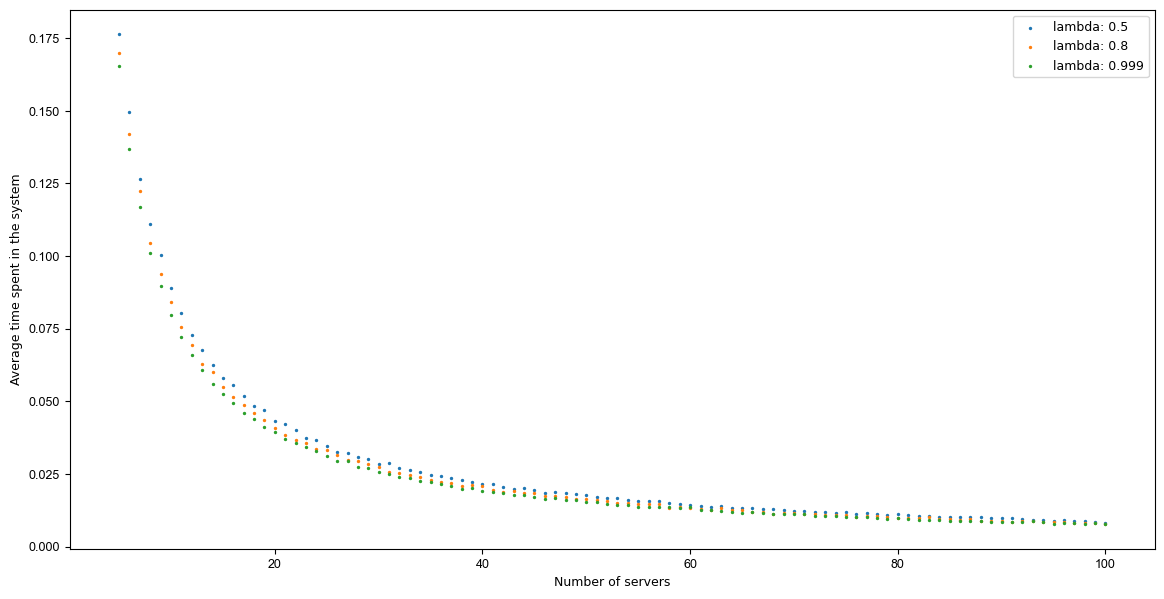

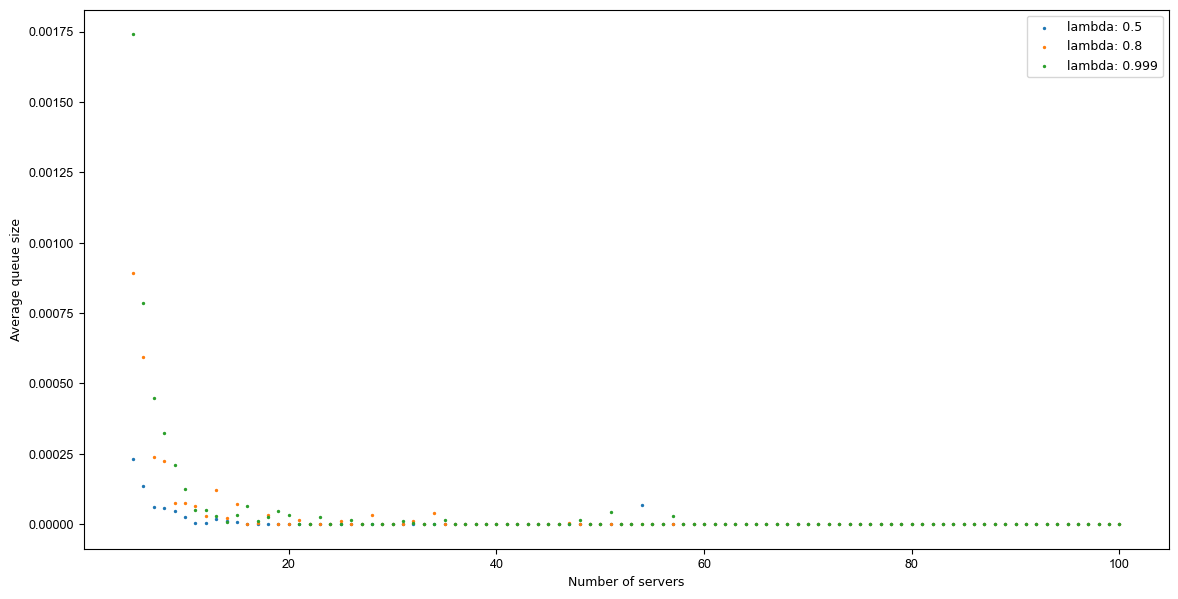

In [109]:
plot_time(read_experiment_data(path_plot, 's2_uss_d3_different_1'))
plot_size(read_experiment_data(path_plot, 's2_uss_d3_different_1'))

In [149]:
print_table(read_experiment_data(path_table, 's2_uss_d3_different_2'))

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |         0.0470 |         6.5885 |         0.0000 |
|          0.8 |         0.0446 |         6.4298 |         0.0000 |
|        0.999 |         0.0437 |         7.0573 |         0.0001 |
+--------------+----------------+----------------+----------------+


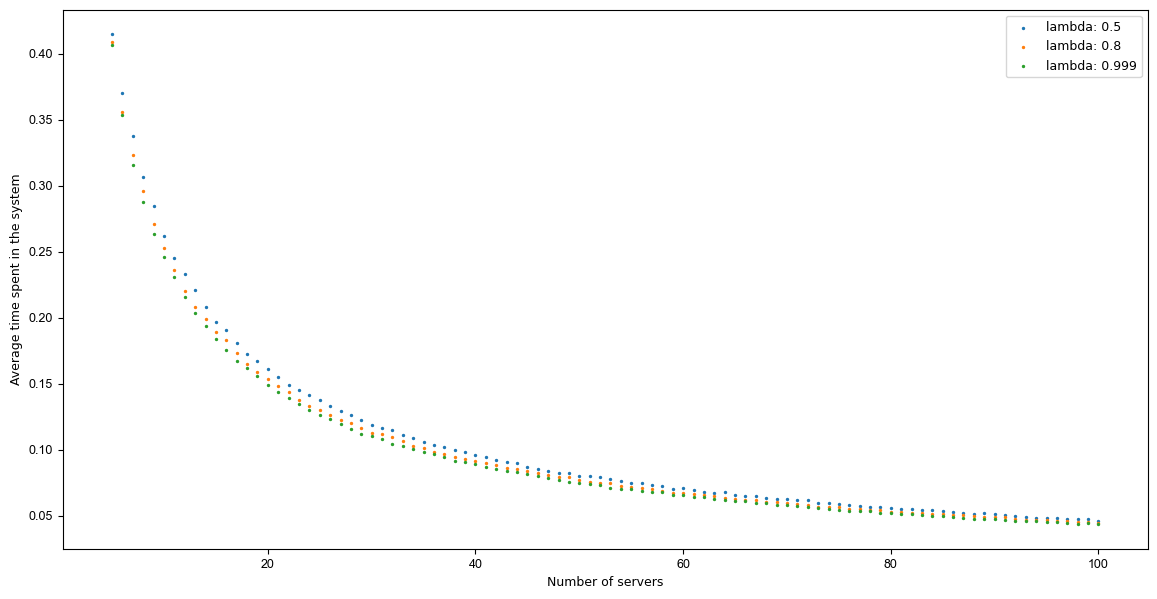

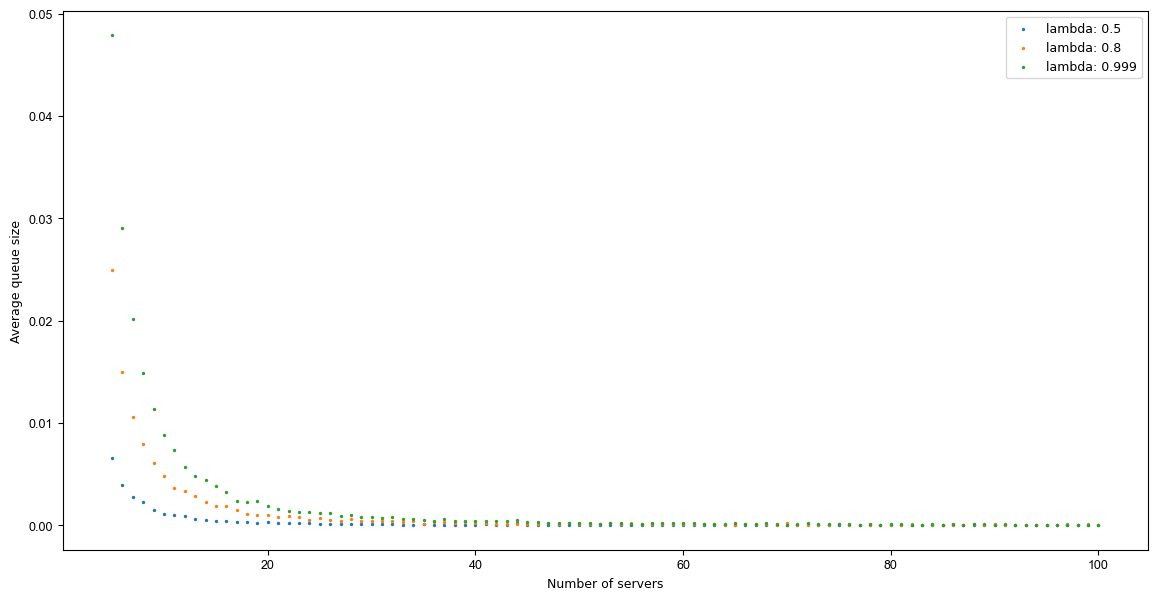

In [111]:
plot_time(read_experiment_data(path_plot, 's2_uss_d3_different_2'))
plot_size(read_experiment_data(path_plot, 's2_uss_d3_different_2'))

In [150]:
print_table(read_experiment_data(path_table, 's2_uss_d3_different_3'))

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |        23.9383 |       522.9332 |        10.2268 |
|          0.8 |       279.0909 |      1336.0463 |       150.5730 |
|        0.999 |       401.8305 |      1566.7347 |       219.8713 |
+--------------+----------------+----------------+----------------+


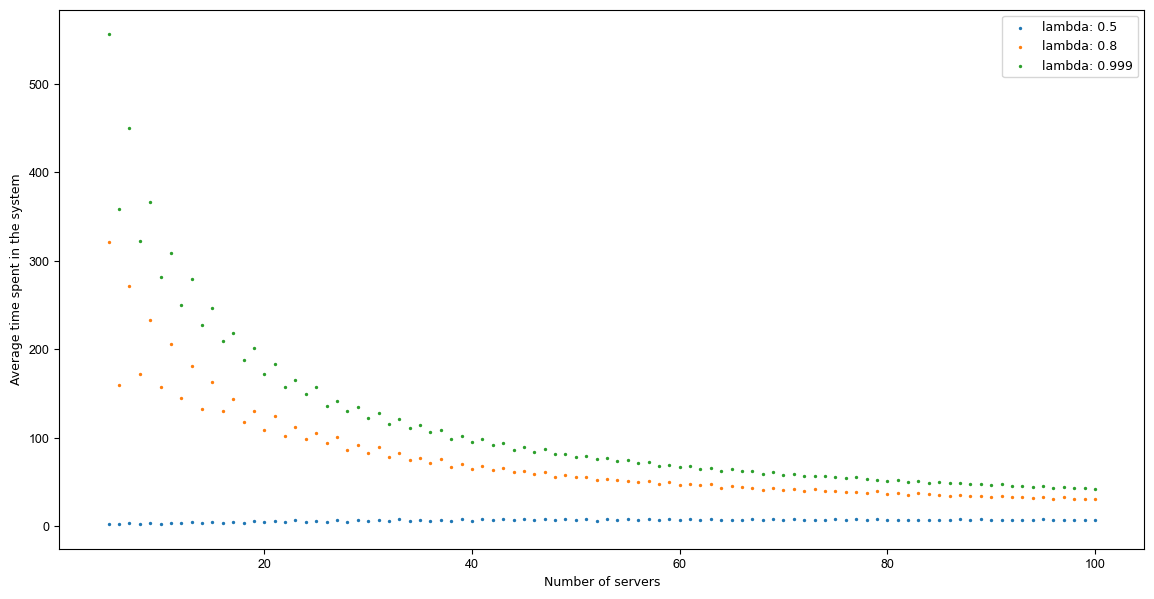

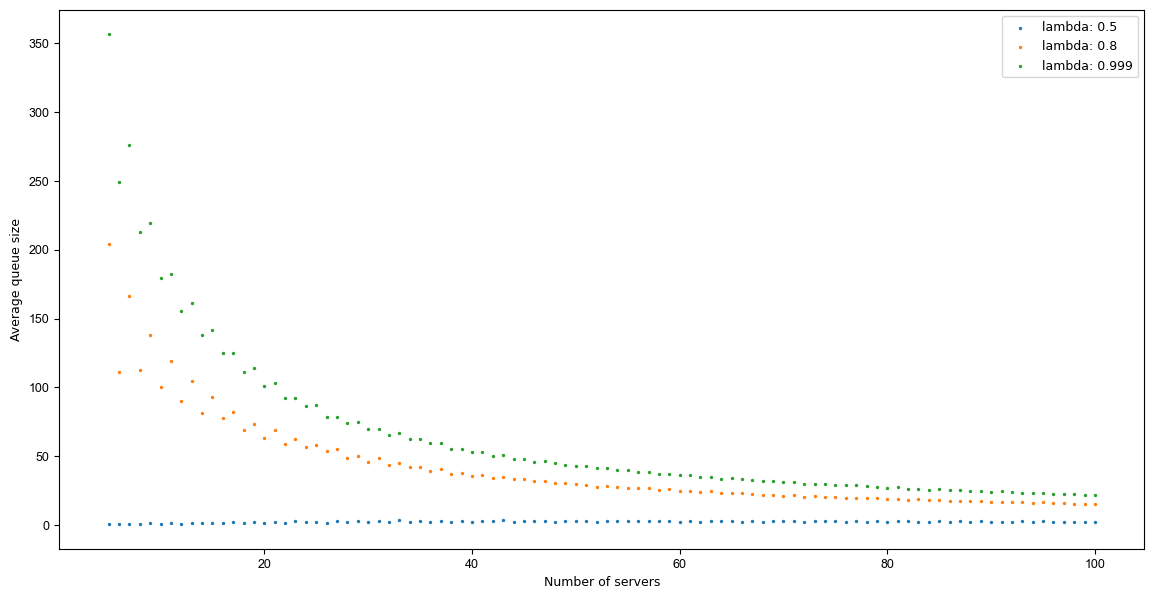

In [113]:
plot_time(read_experiment_data(path_plot, 's2_uss_d3_different_3'))
plot_size(read_experiment_data(path_plot, 's2_uss_d3_different_3'))

In [151]:
print_table(read_experiment_data(path_table, 's2_uss_d5_different_1'))

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |         0.0086 |         3.5444 |         0.0000 |
|          0.8 |         0.0080 |         3.6056 |         0.0000 |
|        0.999 |         0.0076 |         3.4529 |         0.0000 |
+--------------+----------------+----------------+----------------+


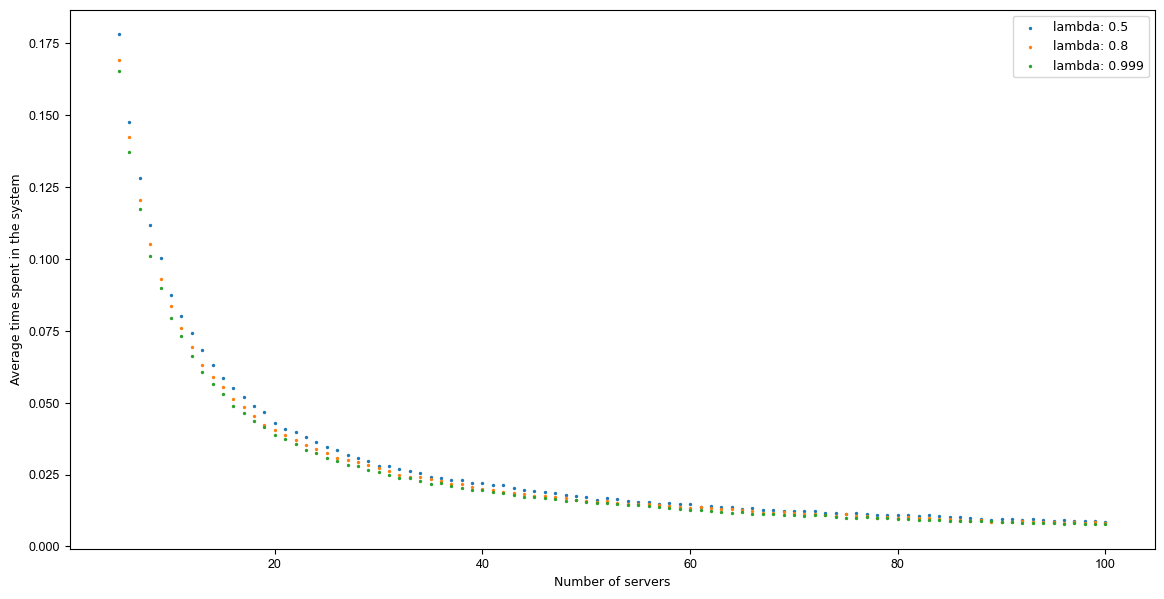

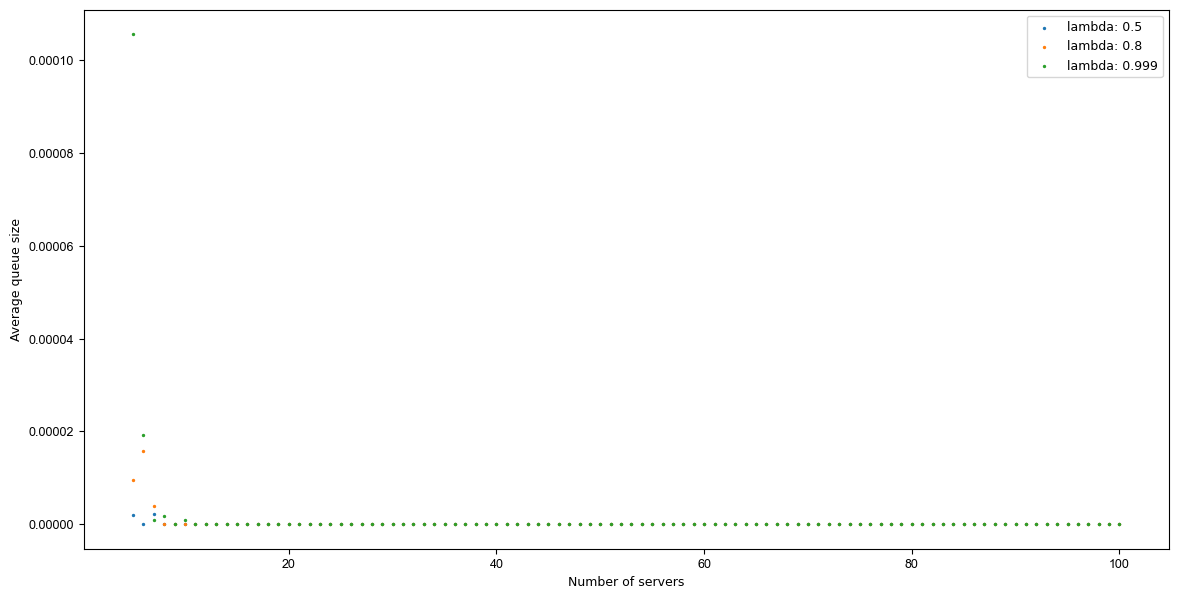

In [115]:
plot_time(read_experiment_data(path_plot, 's2_uss_d5_different_1'))
plot_size(read_experiment_data(path_plot, 's2_uss_d5_different_1'))

In [152]:
print_table(read_experiment_data(path_table, 's2_uss_d5_different_2'))

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |         0.0467 |         7.1514 |         0.0000 |
|          0.8 |         0.0447 |         7.3041 |         0.0000 |
|        0.999 |         0.0434 |         7.0435 |         0.0000 |
+--------------+----------------+----------------+----------------+


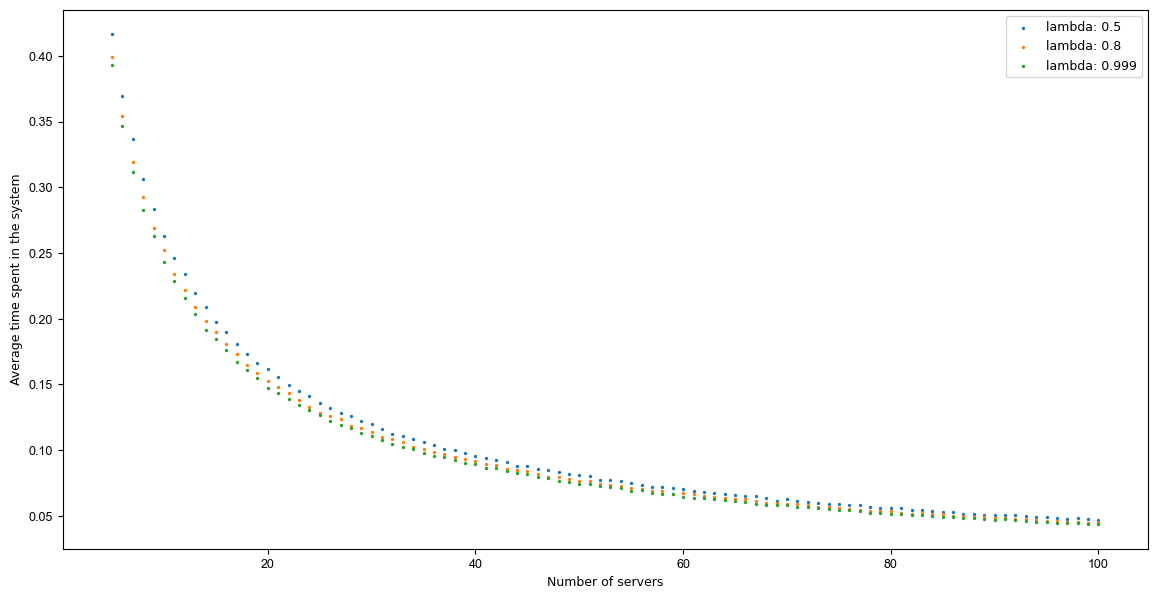

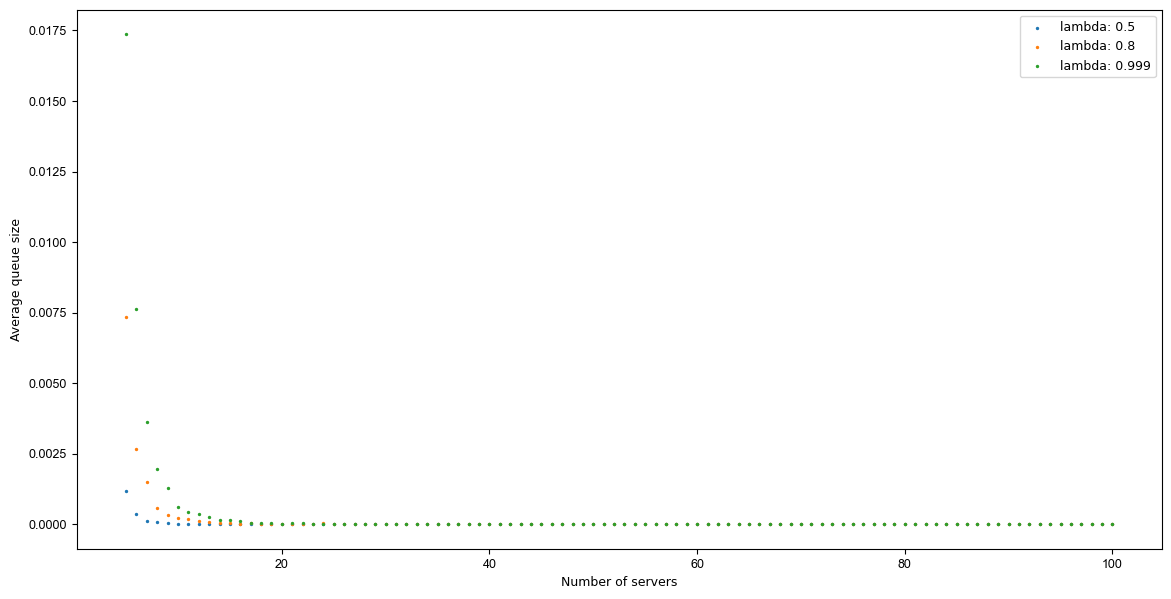

In [117]:
plot_time(read_experiment_data(path_plot, 's2_uss_d5_different_2'))
plot_size(read_experiment_data(path_plot, 's2_uss_d5_different_2'))

In [153]:
print_table(read_experiment_data(path_table, 's2_uss_d5_different_3'))

+--------------+----------------+----------------+----------------+
| Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+--------------+----------------+----------------+----------------+
|          0.5 |         3.1867 |        99.8182 |         0.7165 |
|          0.8 |       272.3646 |       735.1883 |       151.1662 |
|        0.999 |       394.6616 |      1033.9085 |       219.6427 |
+--------------+----------------+----------------+----------------+


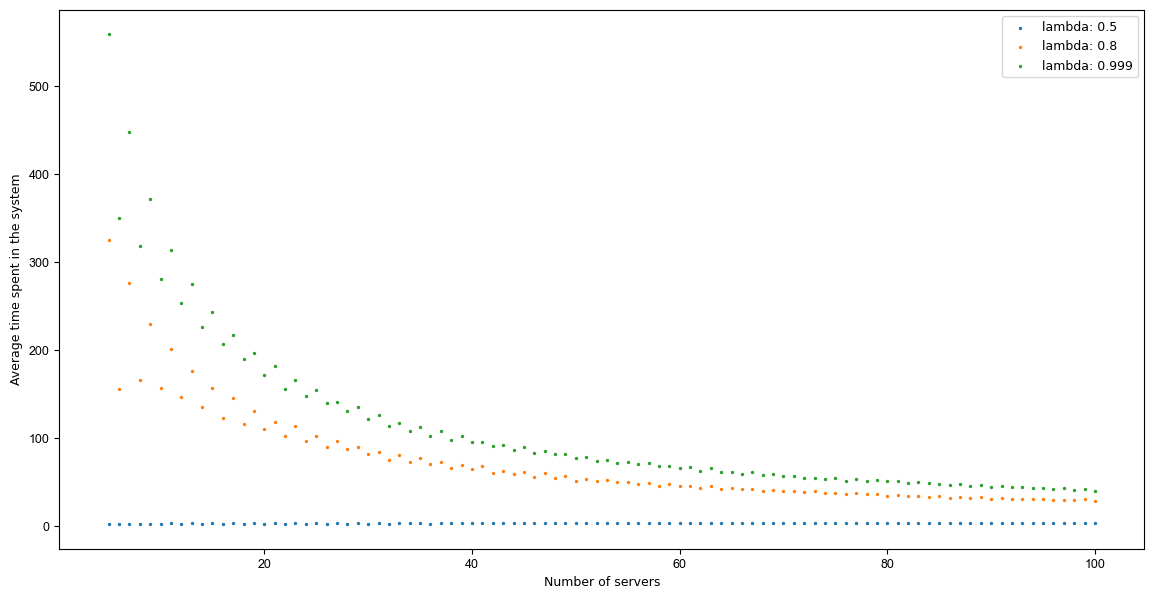

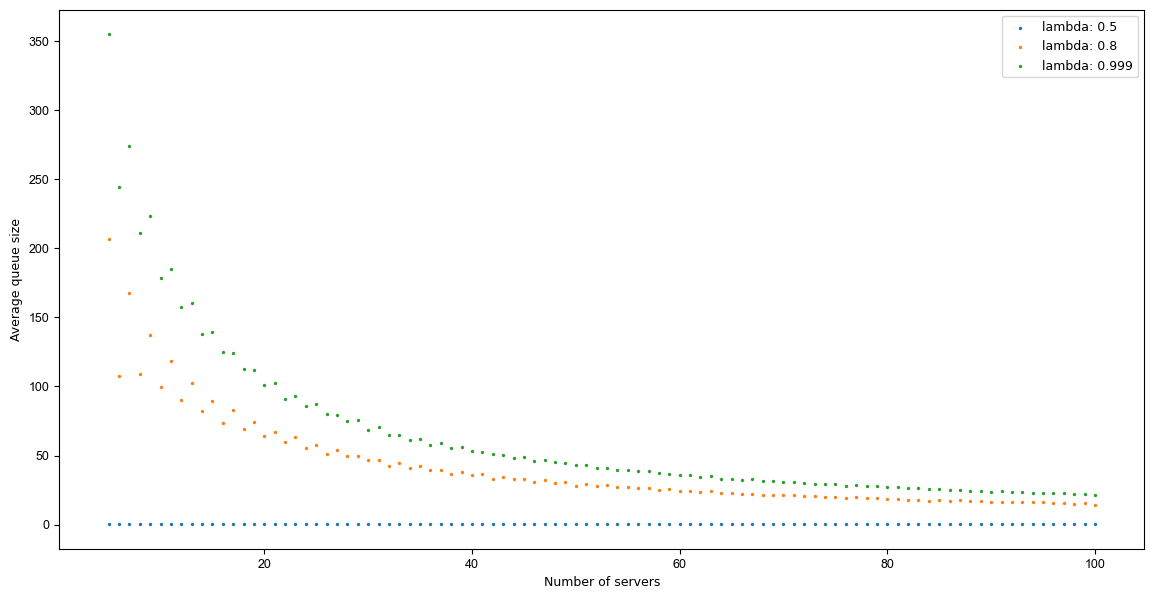

In [119]:
plot_time(read_experiment_data(path_plot, 's2_uss_d5_different_3'))
plot_size(read_experiment_data(path_plot, 's2_uss_d5_different_3'))

#### d) wybór mniej obciążonego z 2 niejednostajnie wybranych serwerów

#### e) wybór mniej obciążonego z d niejednostajnie wybranych serwerów

# Trzeci scenariusz

### Serwery o różnej szybkości, różne zadania

#### a) jednostajny wybór serwera

#### b) wybór mniej obciążonego z 2 jednostajnie wybranych serwerów

#### c) wybór mniej obciążonego z d jednostajnie wybranych serwerów

#### d) wybór mniej obciążonego z 2 niejednostajnie wybranych serwerów

#### e) wybór mniej obciążonego z d niejednostajnie wybranych serwerów

# Combined

## Table

In [155]:
print_combined_table(read_all_experiments_data(path_table))

+-----------------------+--------------+----------------+----------------+----------------+
|              Scenario | Arrival Rate | Avg Time Spent | Max Time Spent | Avg Queue Size |
+-----------------------+--------------+----------------+----------------+----------------+
|                s1_uss |              |                |                |                |
|                       |          0.5 |           2.00 |          20.03 |           1.00 |
|                       |          0.8 |           4.81 |          40.74 |           3.81 |
|                       |        0.999 |          23.56 |         132.00 |          22.39 |
|                       |              |                |                |                |
|             s1_uss_d2 |              |                |                |                |
|                       |          0.5 |           1.27 |          13.38 |           0.26 |
|                       |          0.8 |           1.96 |          15.95 |      

## Plots

### Identyczne serwery i zadania

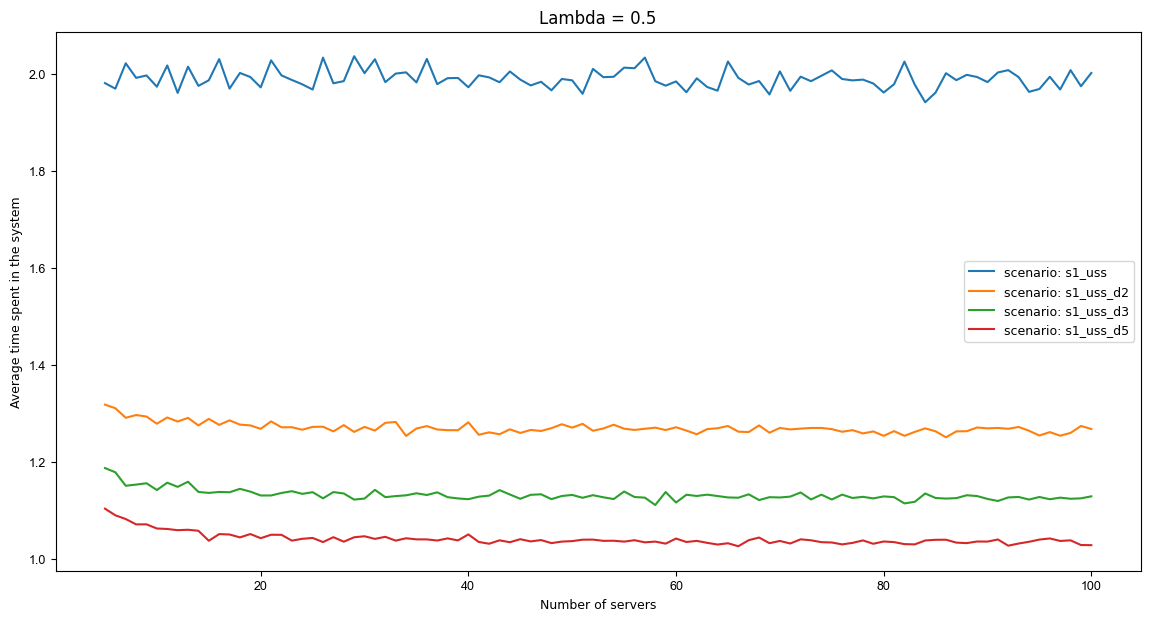

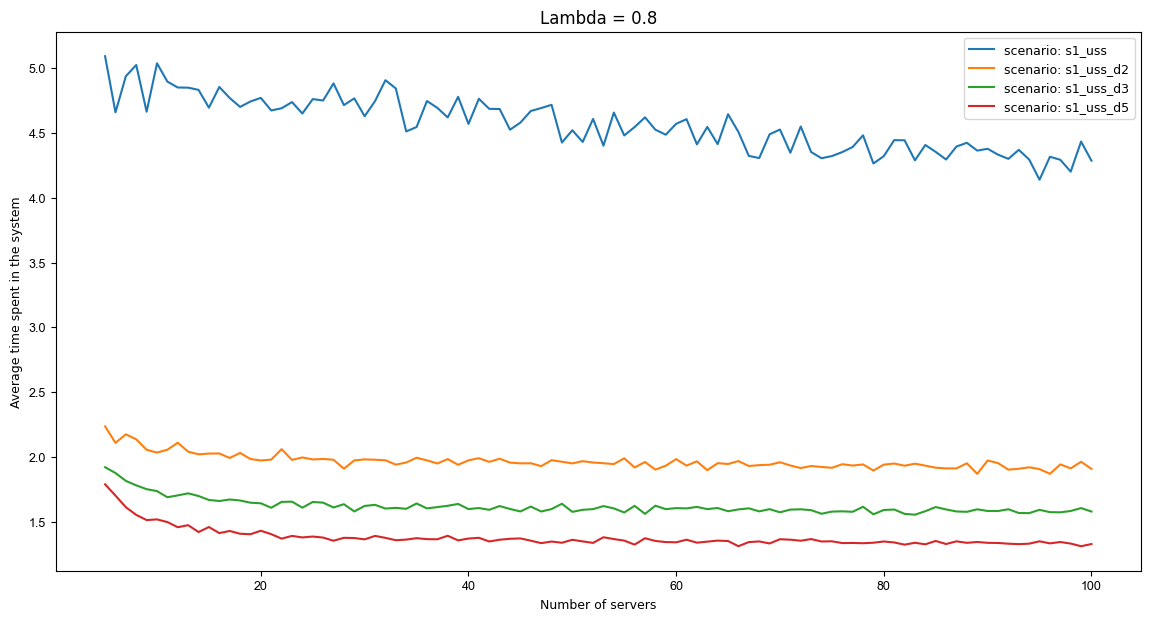

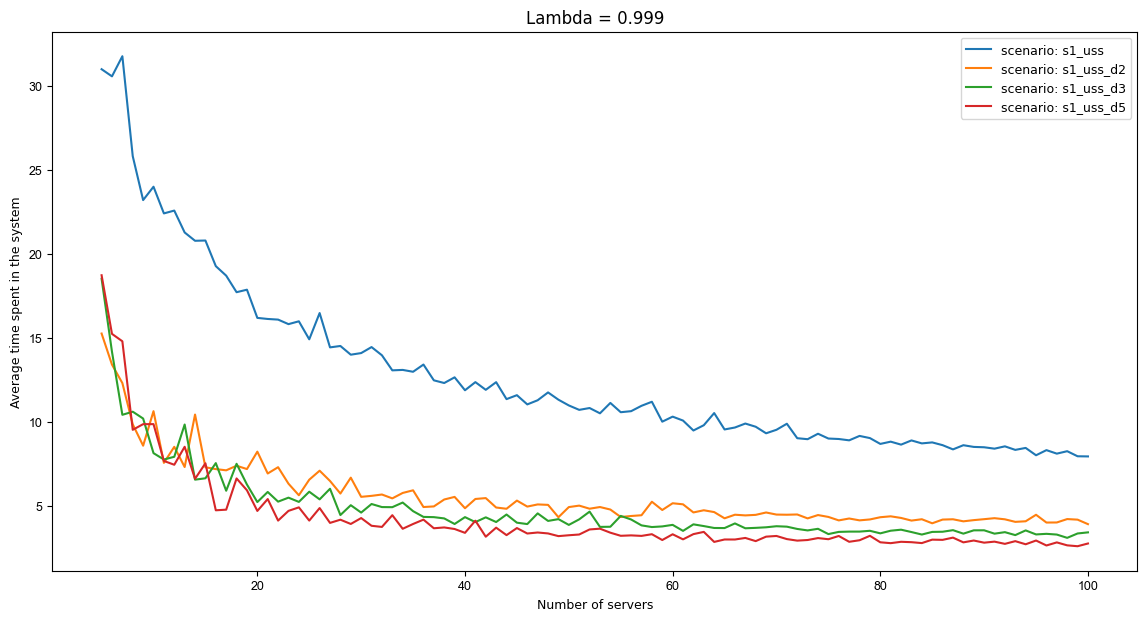

In [121]:
plot_combined(read_all_experiments_data(path_plot), '0.5', 's1_uss')
plot_combined(read_all_experiments_data(path_plot), '0.8', 's1_uss')
plot_combined(read_all_experiments_data(path_plot), '0.999', 's1_uss')

### Serwery o różnej szybkości, takie same zadania

#### Serice_rates = 2^i

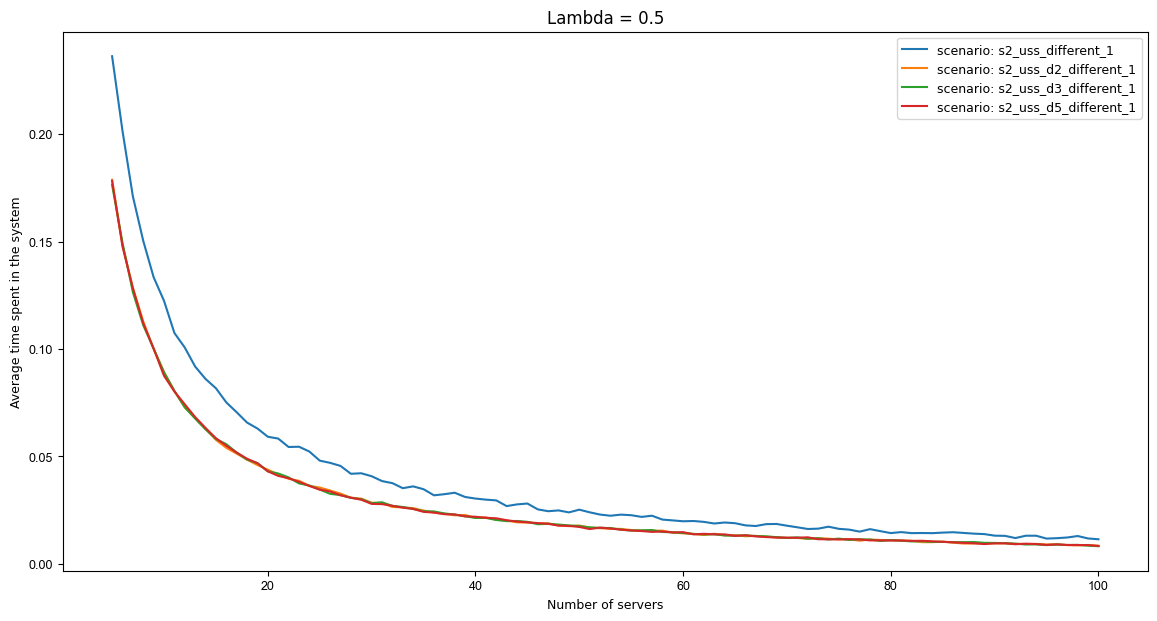

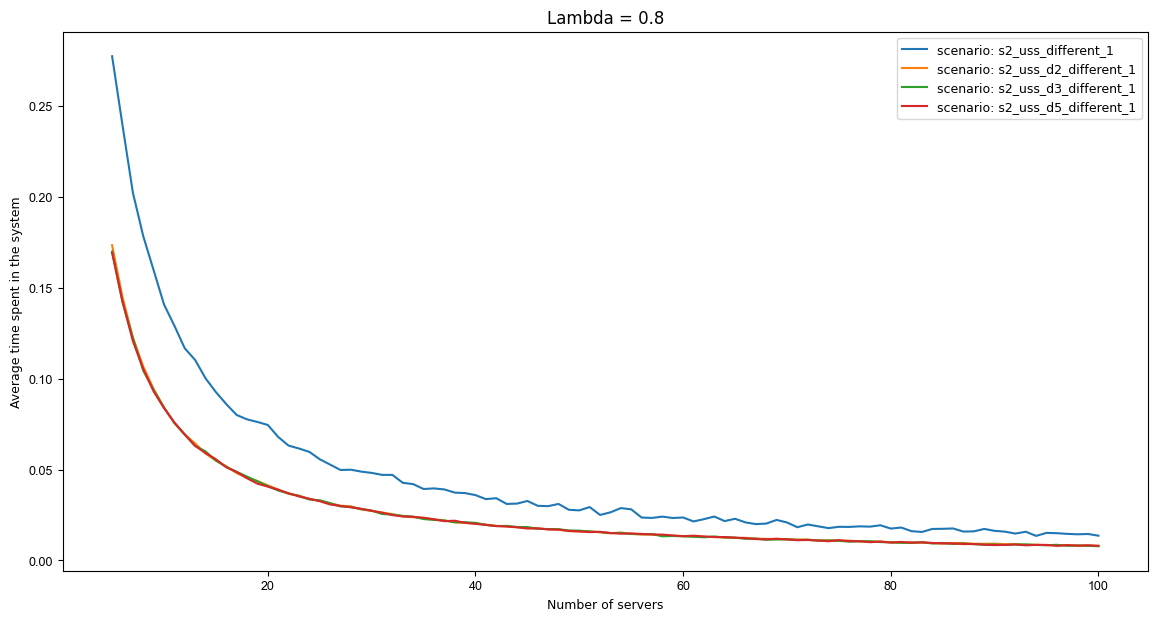

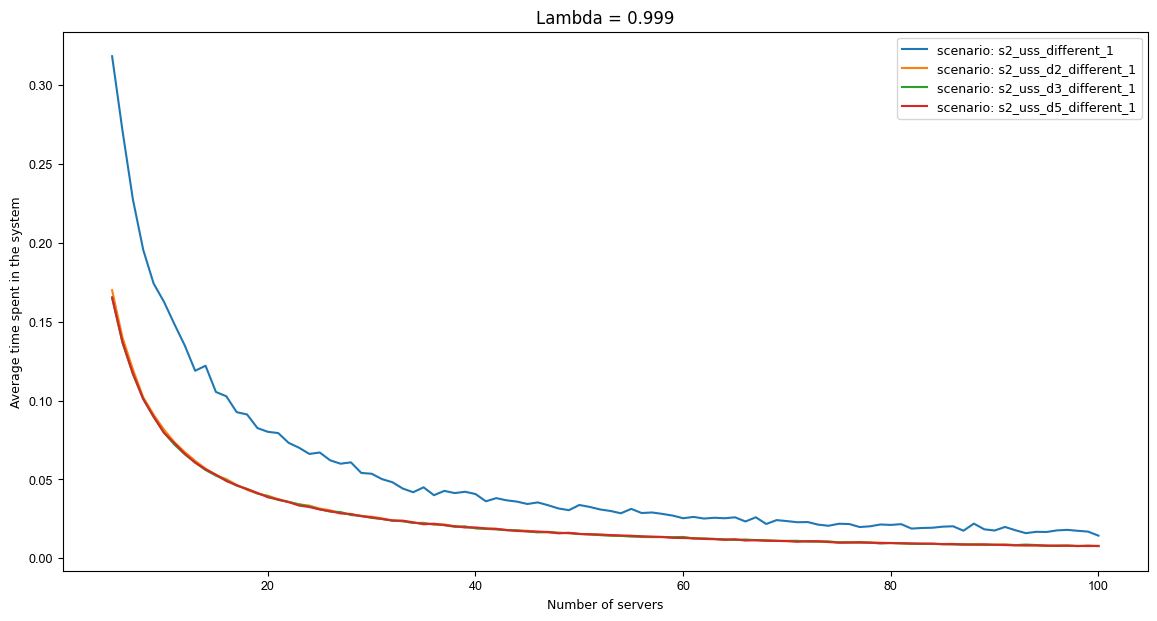

In [124]:
plot_combined(read_all_experiments_data(path_plot), '0.5', 's2_uss_different_1')
plot_combined(read_all_experiments_data(path_plot), '0.8', 's2_uss_different_1')
plot_combined(read_all_experiments_data(path_plot), '0.999', 's2_uss_different_1')

#### Service_rates = i

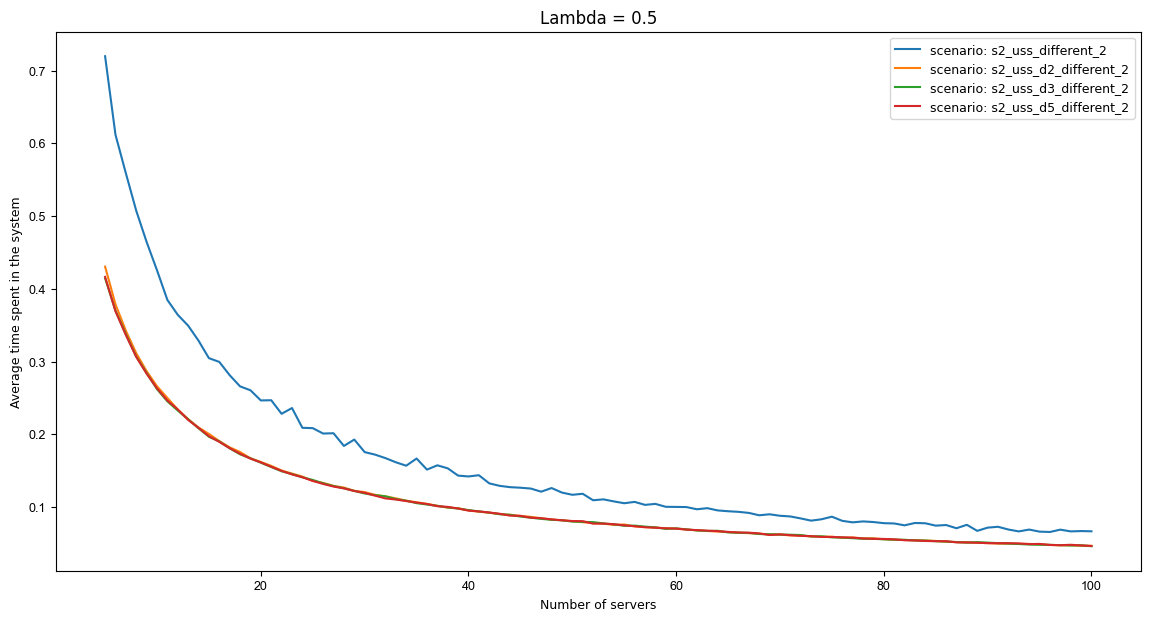

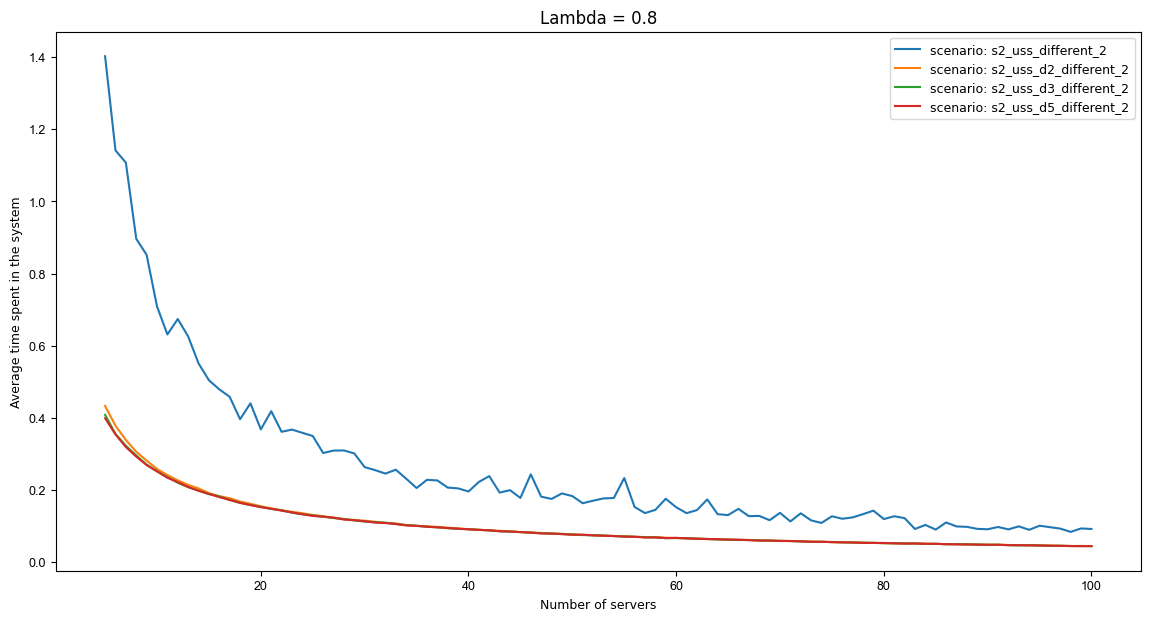

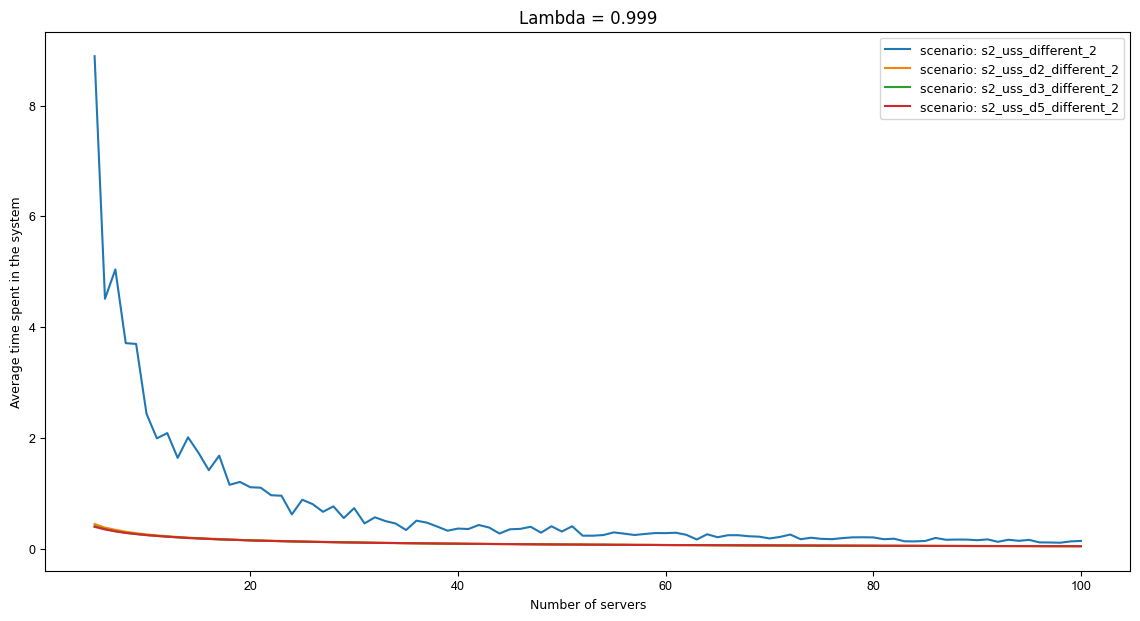

In [125]:
plot_combined(read_all_experiments_data(path_plot), '0.5', 's2_uss_different_2')
plot_combined(read_all_experiments_data(path_plot), '0.8', 's2_uss_different_2')
plot_combined(read_all_experiments_data(path_plot), '0.999', 's2_uss_different_2')

#### Service_rates = 0.1 and 1.0 for n/2

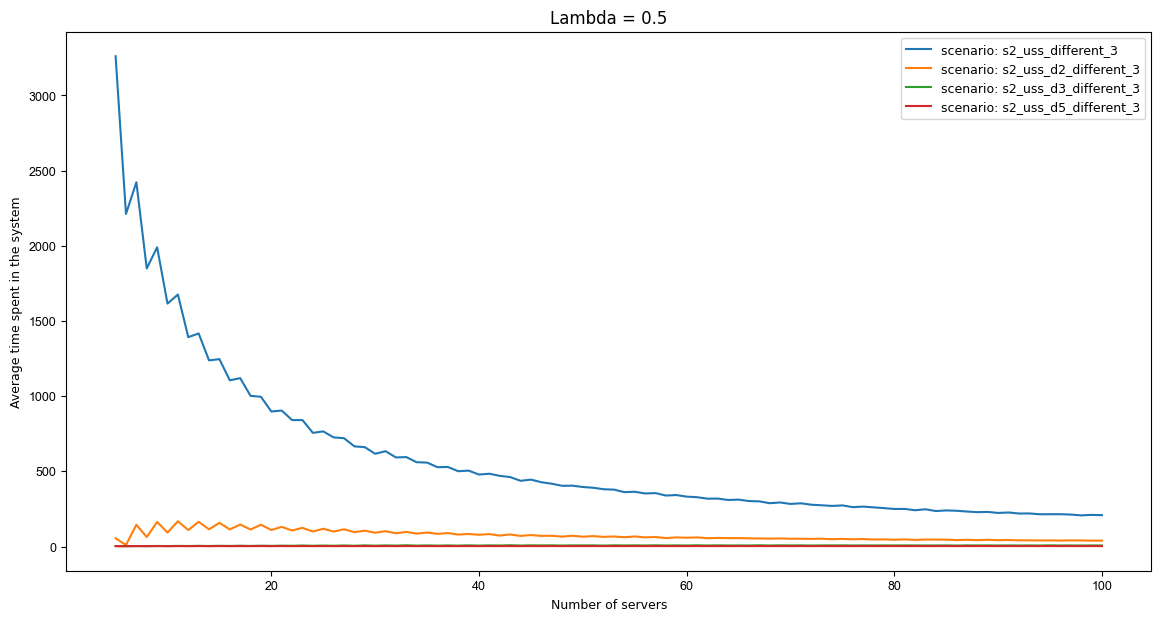

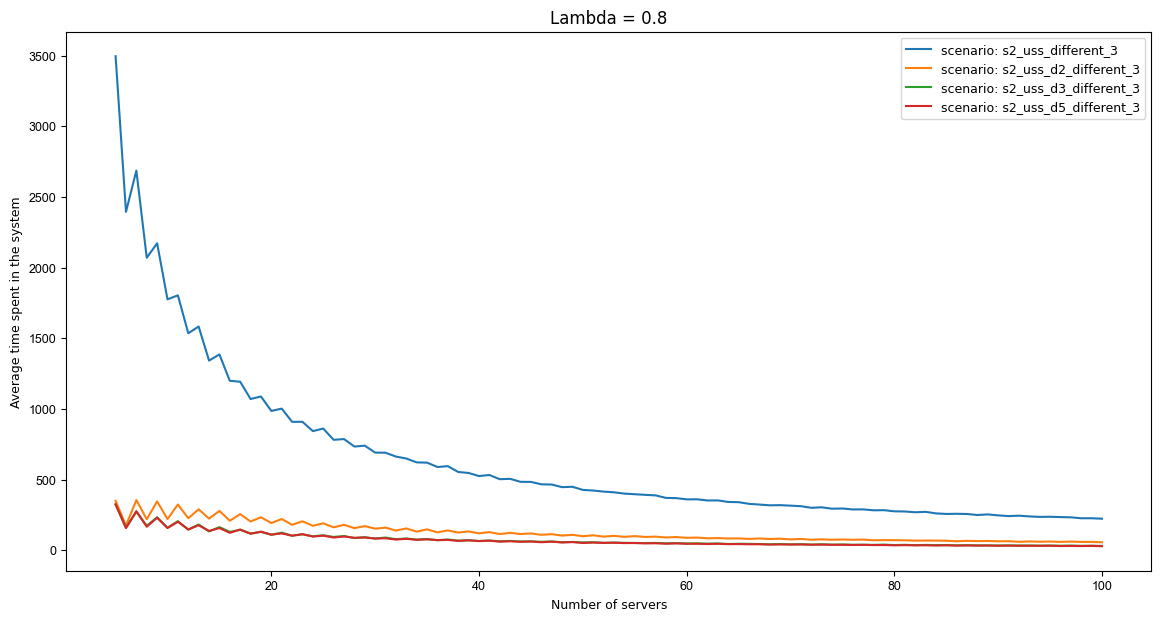

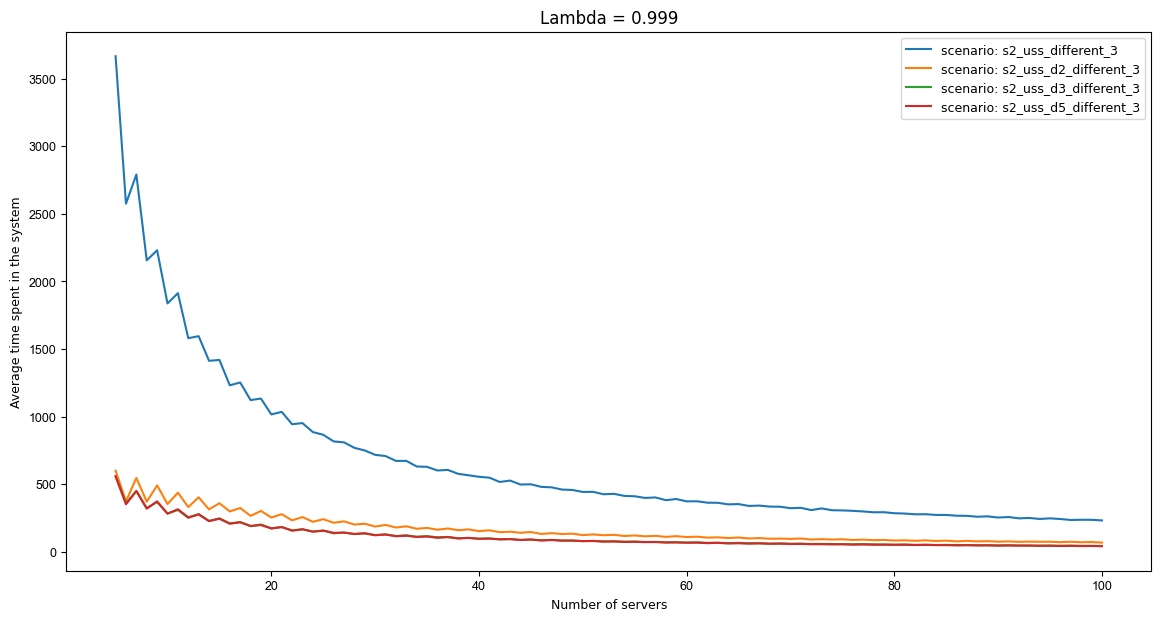

In [126]:
plot_combined(read_all_experiments_data(path_plot), '0.5', 's2_uss_different_3')
plot_combined(read_all_experiments_data(path_plot), '0.8', 's2_uss_different_3')
plot_combined(read_all_experiments_data(path_plot), '0.999', 's2_uss_different_3')

## Histogram

### Service_rates = 2 ^ i

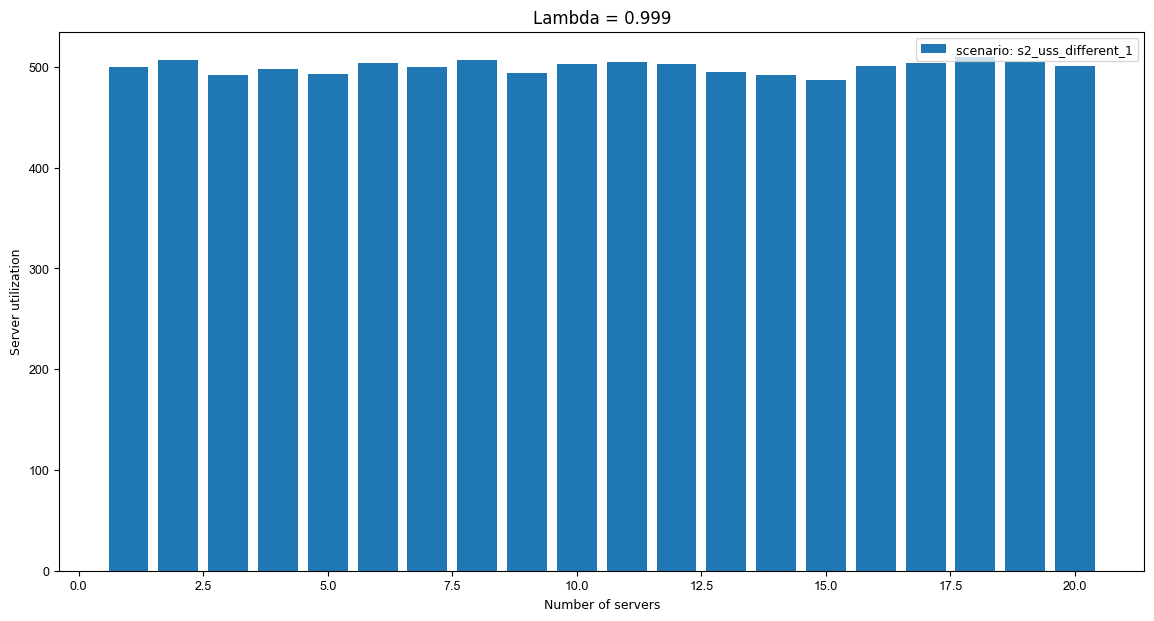

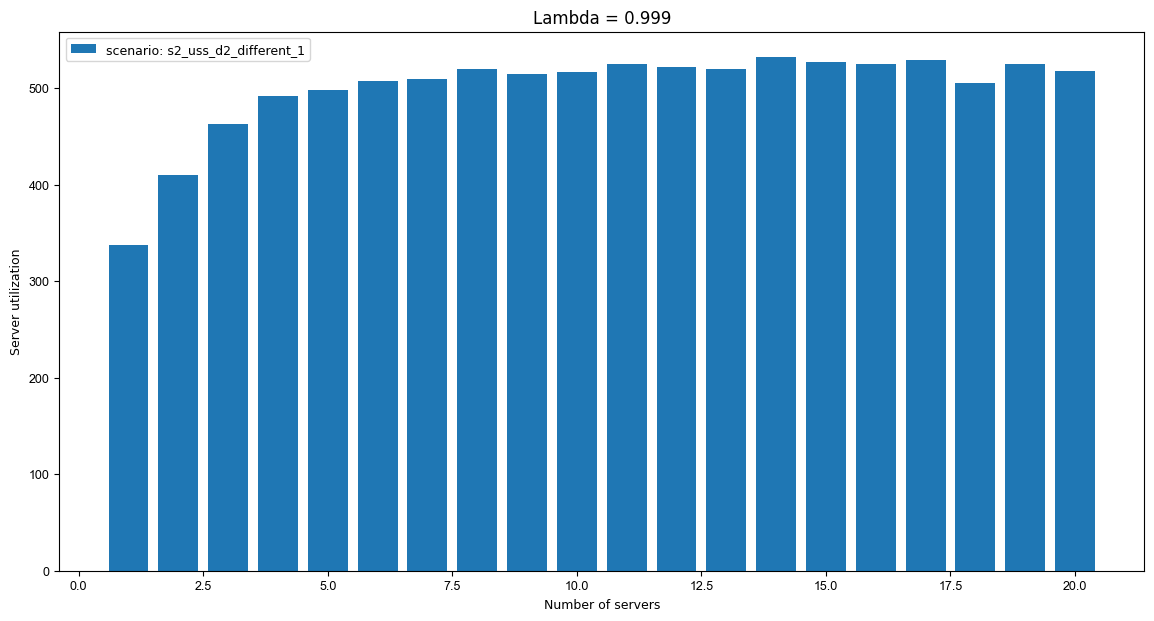

In [129]:
plot_histogram(read_all_experiments_data(path_histogram), '0.999', 'different_1')

### Service_rates = i

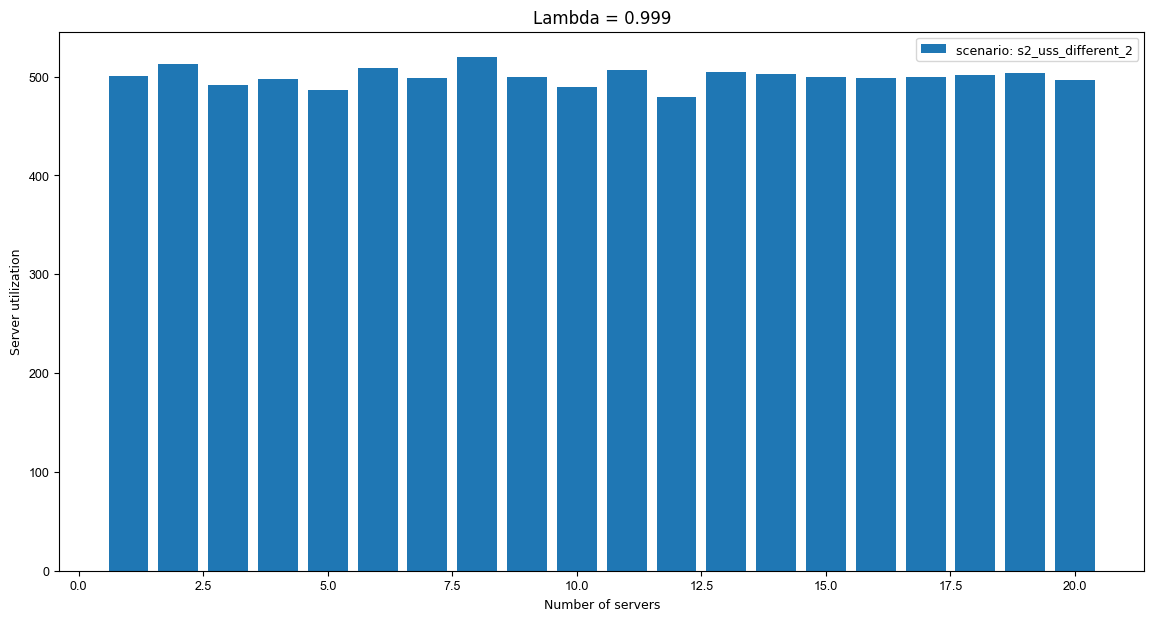

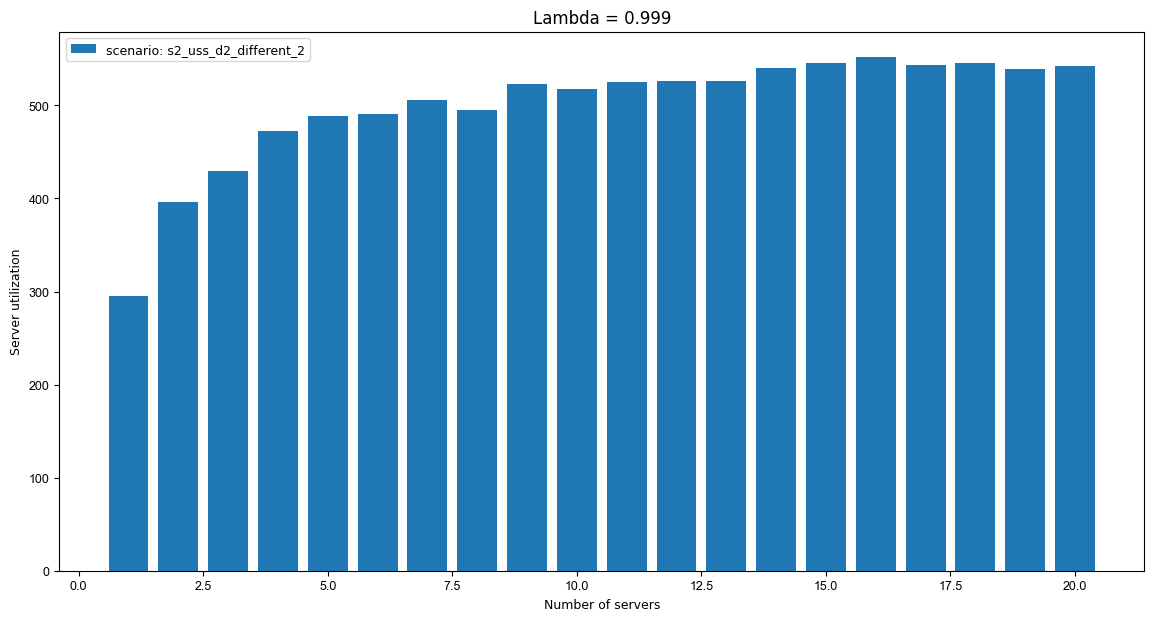

In [130]:
plot_histogram(read_all_experiments_data(path_histogram), '0.999', 'different_2')

### Service_rates = 0.1 and 1.0 for n/2

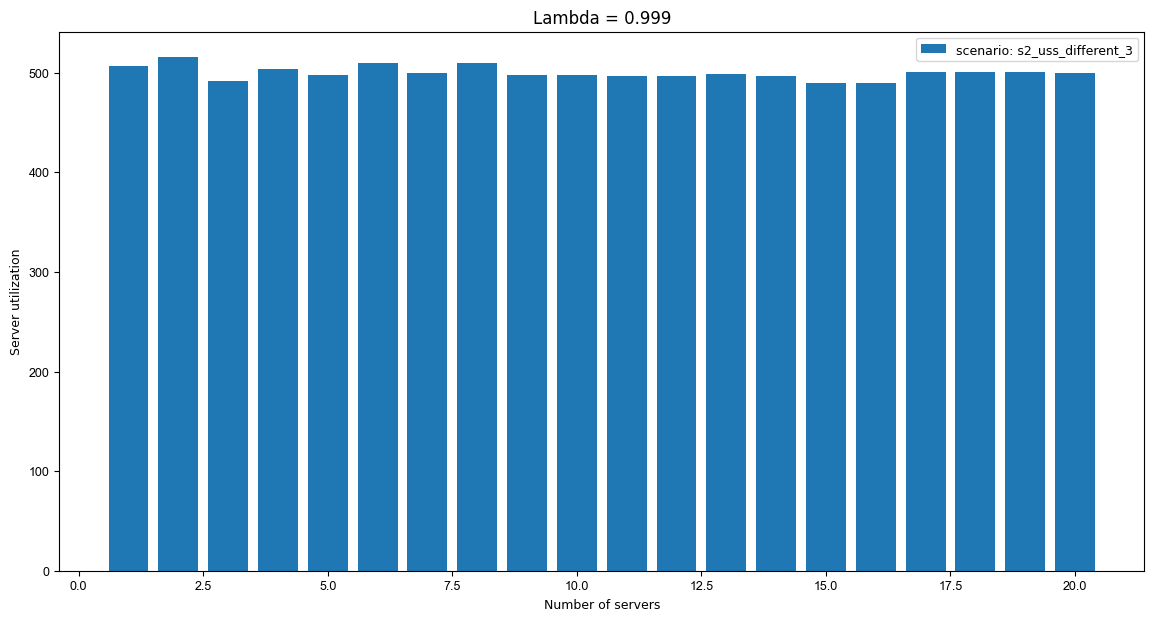

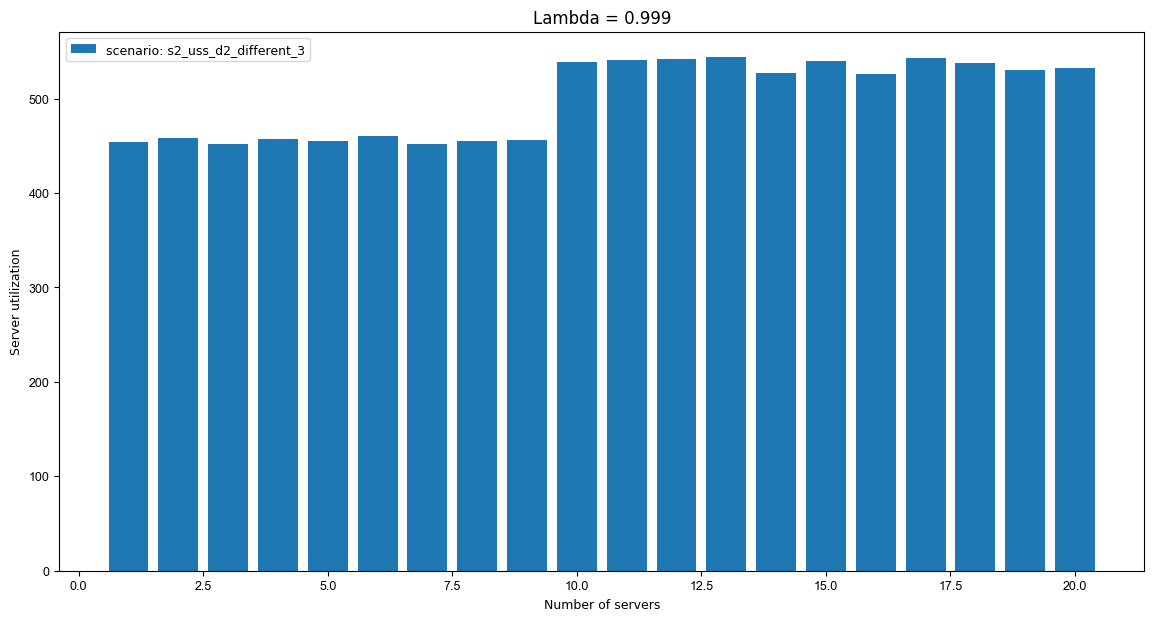

In [128]:
plot_histogram(read_all_experiments_data(path_histogram), '0.999', 'different_3')